# Exploration Data and Annotate chart

In [1]:
#Load all libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import datetime as dt
import matplotlib.image as mpimg

In [2]:
articles = pd.read_csv("articles.csv")
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions_train.csv")

In [3]:
# Let's find out the shapes of all three dataframes
shape=pd.DataFrame({"Total Rows":[articles.shape[0],customers.shape[0],transactions.shape[0]],
                    "Total Columns":[articles.shape[1],customers.shape[1],transactions.shape[1]]},index=['articles','customers','transactions'])
shape

Total Rows  Total Columns
articles          105542             25
customers        1371980              7
transactions    31788324              5

In [4]:
transactions.head()

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

In [5]:
customers.head()


customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [6]:
n = len(pd.unique(transactions['customer_id'])) 
m = len(pd.unique(customers['customer_id'])) 

In [7]:
print(n)
print(m)

1362281
1371980


In [8]:
length=len(set(transactions.customer_id.values.tolist()))/customers.shape[0]
npur=100-(length*100)
print("Total No of customers:",m)
print("No of customers who made at least one transaction:",n)
print("% of customers who made a at least one transaction : ",length*100)
print("Number of customers who did not make a purchase : ",(customers.shape[0] - len(set(transactions.customer_id.values.tolist()))))
print("% of customers who did not make a purchase : ",npur)
print("It seems that not all customers made a purchase, there is around 1% with no purchase history.")

Total No of customers: 1371980
No of customers who made at least one transaction: 1362281
% of customers who made a at least one transaction :  99.29306549658158
Number of customers who did not make a purchase :  9699
% of customers who did not make a purchase :  0.7069345034184238
It seems that not all customers made a purchase, there is around 1% with no purchase history.


In [9]:
articles.head()

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

In [10]:
#check null values in transaction dataset
transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

### Articles Sold

In [11]:
year=transactions.groupby('t_dat').count()[['article_id']]
yearwise1=year.reset_index()
#yearwise1.head()
print (transactions.t_dat.min())
print (transactions.t_dat.max())

2018-09-20
2020-09-22


In [12]:
transactions[transactions['t_dat']=='2018-09-20']

t_dat                                        customer_id  \
0      2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
1      2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2      2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
3      2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
4      2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   
...           ...                                                ...   
48394  2018-09-20  fff3e75605ec575be9b95eda1e6557299e81bba12668d7...   
48395  2018-09-20  fff3e75605ec575be9b95eda1e6557299e81bba12668d7...   
48396  2018-09-20  fff969b13a1c848d53ae3f08f111bfebcdcf6cd27e3815...   
48397  2018-09-20  fff969b13a1c848d53ae3f08f111bfebcdcf6cd27e3815...   
48398  2018-09-20  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...   

       article_id     price  sales_channel_id  
0       663713001  0.050831                 2  
1       541518023  0.030492                 2  
2       505221004  0.015237                 2  
3       685687003  0.016932                 2  
4       685687004  0.016932                 2  
...           ...       ...               ...  
48394   679121002  0.016932                 1  
48395   638642002  0.010153                 1  
48396   562245059  0.020322                 2  
48397   562245059  0.020322                 2  
48398   568597019  0.042356                 1  

[48399 rows x 5 columns]

In [13]:
year

article_id
t_dat                 
2018-09-20       48399
2018-09-21       47543
2018-09-22       17635
2018-09-23       52230
2018-09-24       45984
...                ...
2020-09-18       39284
2020-09-19       36796
2020-09-20       31489
2020-09-21       32130
2020-09-22       32866

[734 rows x 1 columns]

In [14]:
yearasecact = yearwise1.sort_values(['article_id'], ascending=False).head(5)
yearasecact

t_dat  article_id
373  2019-09-28      198622
569  2020-04-11      162799
435  2019-11-29      160875
64   2018-11-23      142018
9    2018-09-29      141700

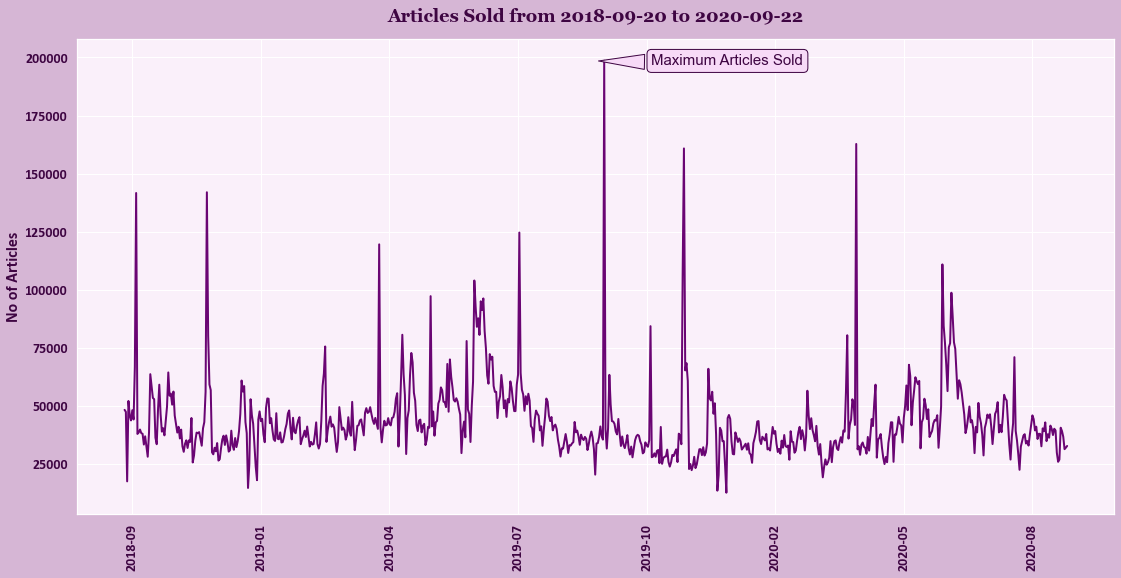

In [15]:
yearwise1['t_dat'] = pd.to_datetime(yearwise1['t_dat'], format='%Y/%m/%d')

sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot('t_dat', 'article_id', data=yearwise1, color='#6a0573', linewidth=2)

plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)
ttl = ax.set_title('Articles Sold from 2018-09-20 to 2020-09-22', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')

x_line_annotation = dt.datetime(2019,9,22)

ax.annotate('Maximum Articles Sold',
            xy=(x_line_annotation, 198522),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))


ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)


there are distinct spikes in 3 years.Maximum articles 198,622 are sold on the date 2019-09-28 which breaks all the records in 3 years.where as second maximum 162,799 articles are sold on date 2020-04-11 and third maximum 160,875 articles are sold on date 2019-11-29.

### Transaction Amount

In [16]:
yearp=transactions.groupby('t_dat').sum()[['price']]
yearwise1p=yearp.reset_index()
#yearwise1p.head()
print (yearwise1p.price.max())

6161.6030677966


In [17]:
yearp

price
t_dat                  
2018-09-20  1415.345847
2018-09-21  1419.262305
2018-09-22   530.437627
2018-09-23  1593.783085
2018-09-24  1407.609610
...                 ...
2020-09-18  1363.858119
2020-09-19  1227.471305
2020-09-20  1116.071068
2020-09-21  1139.598051
2020-09-22  1133.418424

[734 rows x 1 columns]

In [18]:
yearasec = yearwise1p.sort_values(['price'], ascending=False).head(5)
yearasec

t_dat        price
373  2019-09-28  6161.603068
435  2019-11-29  4444.342390
9    2018-09-29  4071.381305
569  2020-04-11  3961.987763
64   2018-11-23  3891.939441

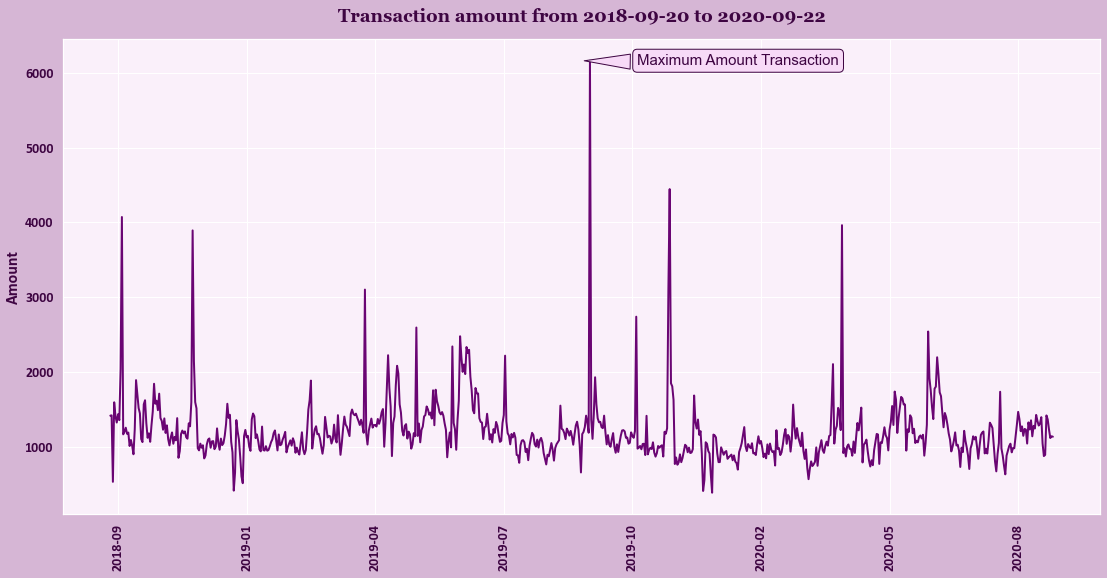

In [19]:
yearwise1p['t_dat'] = pd.to_datetime(yearwise1p['t_dat'], format='%Y/%m/%d')

sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot('t_dat', 'price', data=yearwise1p, color='#6a0573', linewidth=2)

plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)
ttl = ax.set_title('Transaction amount from 2018-09-20 to 2020-09-22', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
x_line_annotation = dt.datetime(2019,9,22)

ax.annotate('Maximum Amount Transaction',
            xy=(x_line_annotation,6161),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))

ttl.set_position([.5, 1.02])
ax.set_ylabel('Amount', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)


maximum transaction amount on date 2019-09-28 is 6,161.where as second maximum transaction is 4,444 on date 2019-11-29 which shows that the transacation amount is 25% decreases in 2019-11-29.

### Top Ten Customers



In [20]:
check=transactions.groupby('customer_id').count()[['article_id']].sort_values('article_id', ascending=False)
newcheck=check.head(10)
newcheck1=newcheck.reset_index()

In [21]:
check.head()

article_id
customer_id                                                   
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee98...        1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca...        1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b...        1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df5...        1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6...        1237

In [22]:
fig = go.Figure(data=[go.Table(
    header=dict(values = [['<b>Customer ID</b><br>Top 10'],
                ['<b>Item Count</b>']],
                fill_color='#d6b6d5',
                font_color="#3e0542",
                align='left'),
    cells=dict(values=[newcheck1.customer_id, newcheck1.article_id],
               fill_color='#faf0fa',
               align='left'))
])

fig.show()

top 10 customers are those which bought article more than 1,000 in the last three years

### Articles Sold by Age Distribution

In [23]:
custfin= pd.DataFrame(customers, columns = ['customer_id','age'])

In [24]:
total_tran = pd.merge(custfin,transactions, how='right', on='customer_id')

In [25]:
total_tran["age"].fillna(value=0,inplace=True)
total_tran["age"]=total_tran["age"].apply(int)

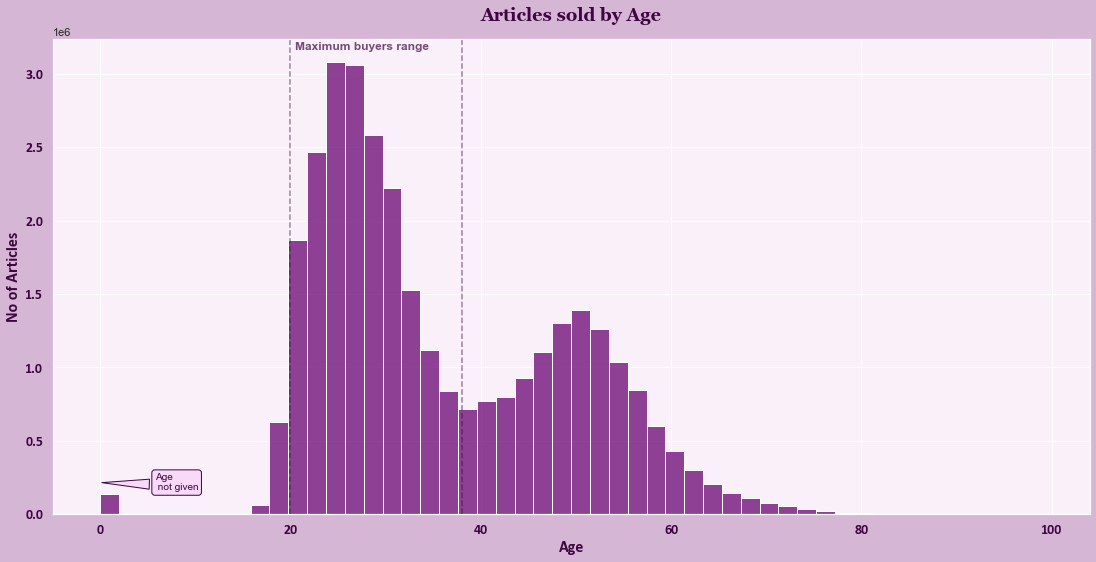

In [26]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)
ax = sns.histplot(data=total_tran, x='age', bins=50,color='#6a0573')

ax.annotate('Age \n not given',
            xy=(0,216100),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=10, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))
ax.axvline(x=20, linestyle='dashed', alpha=0.5,color='#3e0542')
ax.axvline(x=38, linestyle='dashed', alpha=0.5,color='#3e0542')
ax.text(x=20.5, y=3161000, s='Maximum buyers range', alpha=0.7, color='#3e0542',fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('Age', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ttl = ax.set_title('Articles sold by Age', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

### Articles Sold by Sales Channel

In [27]:
datanew= pd.DataFrame(total_tran, columns = ['price','t_dat','sales_channel_id','article_id'])
df = datanew.groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()
print (df.article_id.max())
print (df.article_id.min())

168688
4


In [28]:
dfasec = df.sort_values(['article_id'], ascending=True).head(5)
dfasec

t_dat  sales_channel_id  article_id
1140  2020-05-04                 1           4
1137  2020-05-02                 1           5
192   2018-12-25                 1          43
922   2019-12-25                 1          46
1151  2020-05-10                 1          90

In [29]:
df['t_dat'] = pd.to_datetime(df['t_dat'], format='%Y/%m/%d')

In [30]:
xmin = df["t_dat"].min()
xmax = df["t_dat"].max()

ymin = df["article_id"].min() - 1000
ymax = df["article_id"].max() + 1000

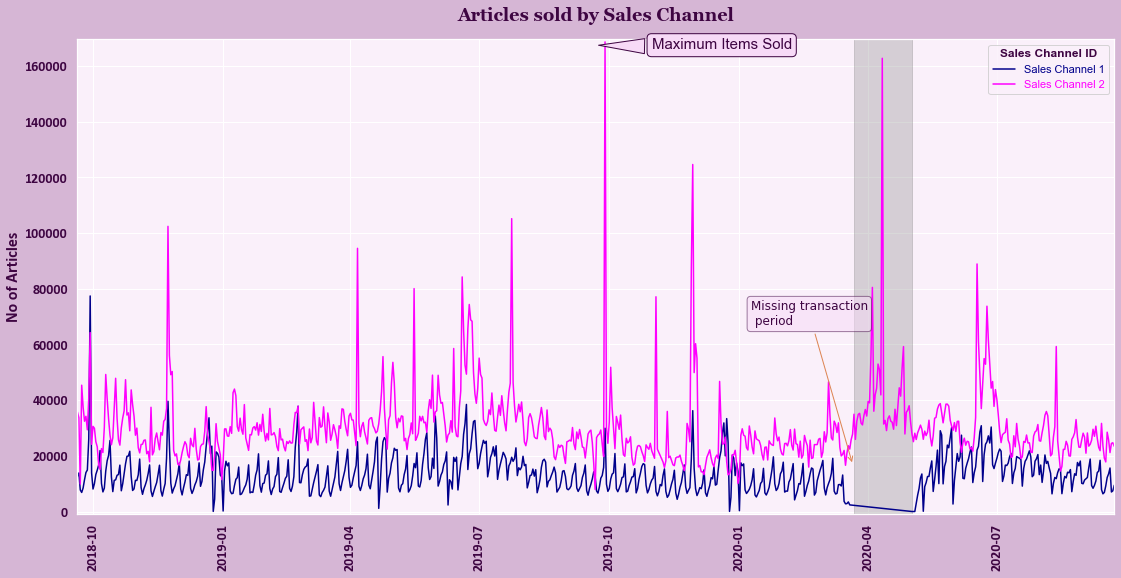

In [31]:
#df['t_dat'] = pd.to_datetime(df['t_dat'], format='%Y/%m/%d')
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot(df.loc[df["sales_channel_id"]==1, "t_dat"], df.loc[df["sales_channel_id"]==1, "article_id"], label="Sales Channel 1", color="Darkblue")
ax.plot(df.loc[df["sales_channel_id"]==2, "t_dat"], df.loc[df["sales_channel_id"]==2, "article_id"], label="Sales Channel 2", color="Magenta")
ax.annotate('Maximum Items Sold',
            xy=(x_line_annotation,167500),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)

ax.fill_betweenx([ymin,ymax],18343, 18384, color="gray", alpha=0.3)

props = dict(boxstyle='round',facecolor='#f7daf7', edgecolor='#3e0542', alpha=0.5)
ax.annotate("Missing transaction\n period", (18342, 17000), (18270, 67000), \
    arrowprops={"arrowstyle": "->", "color":"C1"},
    color='#3e0542',
    bbox=props,
    fontproperties='DejaVu Sans'
    );


ax.set_ylabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')

plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
plt.xticks(rotation=90)
legend=plt.legend(title="Sales Channel ID",labelcolor='linecolor')
plt.setp(legend.get_title(), color='#3e0542',fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.title(f"Articles sold by Sales Channel",fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

### Transaction Amount by Sales Channel



In [32]:
dfp = datanew.groupby(["t_dat", "sales_channel_id"])["price"].sum().reset_index()
print (dfp.price.max())

5365.663576271178


In [33]:
dfp.sort_values(by=['price'], ascending=False)

t_dat  sales_channel_id        price
747   2019-09-28                 2  5365.663576
1116  2020-04-11                 2  3961.987763
871   2019-11-29                 2  3595.399458
129   2018-11-23                 2  2957.734881
869   2019-11-28                 2  2671.293610
...          ...               ...          ...
1151  2020-05-10                 1     2.124763
192   2018-12-25                 1     0.705220
922   2019-12-25                 1     0.600831
1137  2020-05-02                 1     0.182983
1140  2020-05-04                 1     0.077237

[1423 rows x 3 columns]

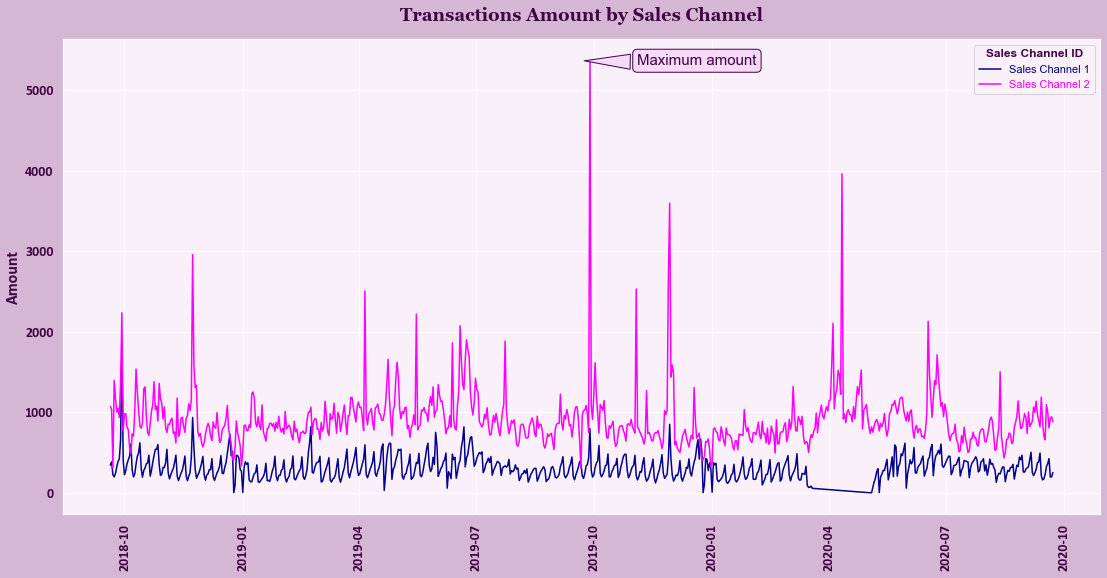

In [34]:
dfp['t_dat'] = pd.to_datetime(dfp['t_dat'], format='%Y/%m/%d')
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot(dfp.loc[dfp["sales_channel_id"]==1, "t_dat"], dfp.loc[dfp["sales_channel_id"]==1, "price"], label="Sales Channel 1", color="Darkblue")
ax.plot(dfp.loc[dfp["sales_channel_id"]==2, "t_dat"], dfp.loc[dfp["sales_channel_id"]==2, "price"], label="Sales Channel 2", color="Magenta")
ax.annotate('Maximum amount',
            xy=(x_line_annotation,5365),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))


ax.set_ylabel('Amount', color=font_color, fontsize=16, **hfont,fontweight = 'bold')

plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
plt.xticks(rotation=90)
legend=plt.legend(title="Sales Channel ID",labelcolor='linecolor')
plt.setp(legend.get_title(), color='#3e0542',fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.title(f"Transactions Amount by Sales Channel",fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Maximum transaction amount on the date 2019-09-28 are also hit by sales channel 2.Transactions amount are missing for sales channel 1 for few months

### Articles sold by Product Group

In [35]:
datanew1= pd.DataFrame(transactions, columns = ['article_id','price'])
artdept=pd.DataFrame(articles, columns = ['article_id','colour_group_name','department_name','index_group_name','product_group_name'])

In [36]:
department = pd.merge(artdept,datanew1, how='right', on='article_id')

In [37]:
departmentc=department.groupby(['product_group_name','index_group_name'])['article_id'].count().reset_index()
departmentc1 = departmentc.sort_values(['article_id'], ascending=False)

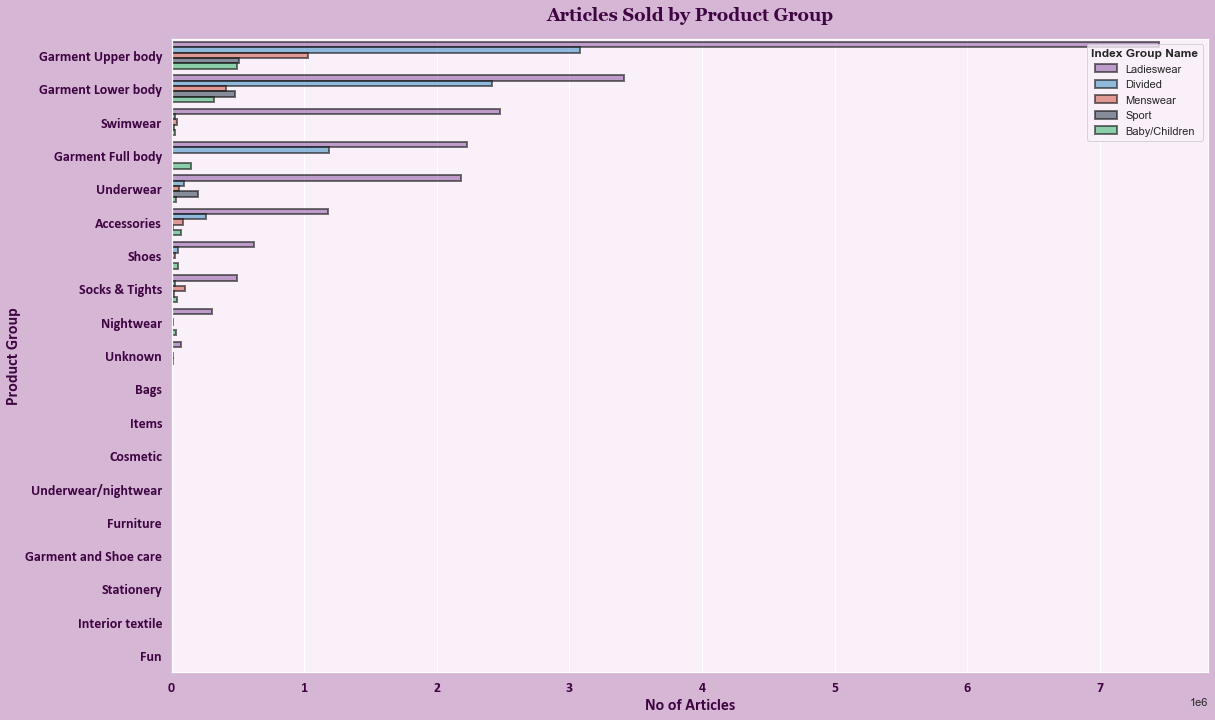

In [38]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"]

sns.barplot(data=departmentc1,y="product_group_name", x="article_id",hue="index_group_name",palette=flatui,alpha = 0.6, edgecolor = 'k', linewidth = 2)

plt.tight_layout()


ttl = ax.set_title('Articles Sold by Product Group', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')


ttl.set_position([.5, 1.02])
ax.set_ylabel('Product Group', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
legend=plt.legend(title="Index Group Name")
plt.setp(legend.get_title(),fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Ladieswear index group are more dominant for top 5 product group

### Articles Sold by Department

In [39]:
departmentp=department.groupby(['department_name'])['article_id'].count().reset_index()
departmentp1 = departmentp.sort_values(['article_id'], ascending=False).head(50)

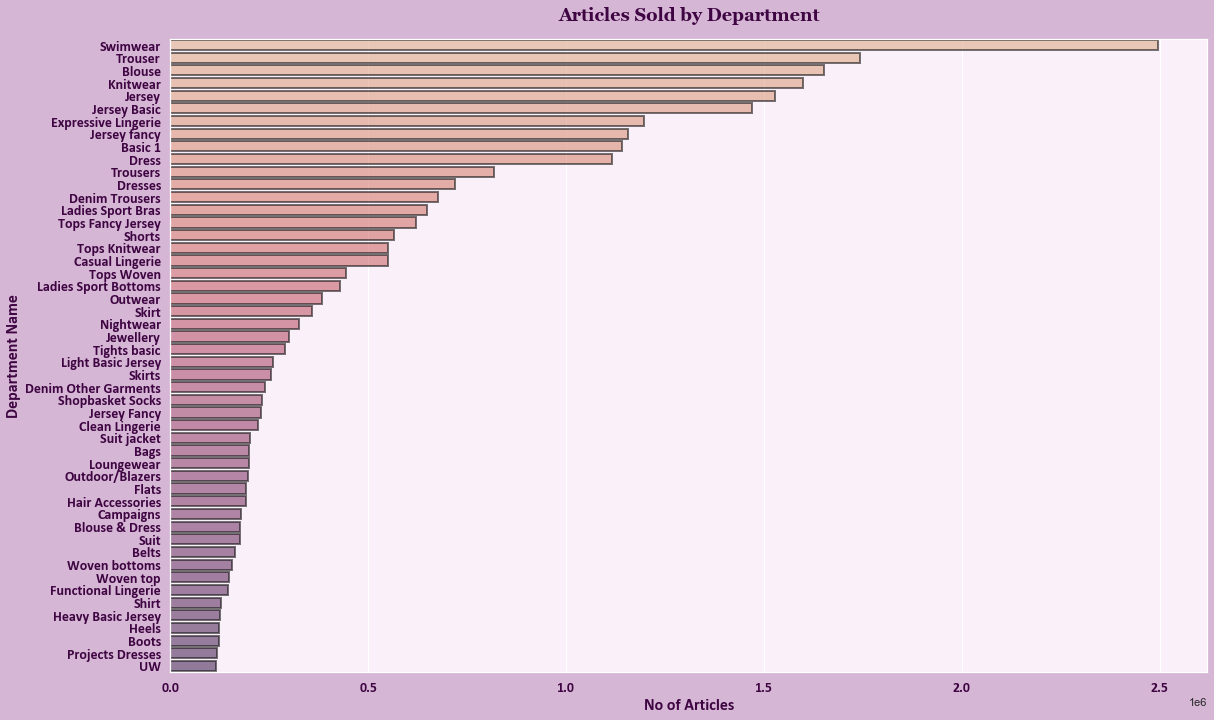

In [40]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
sns.barplot(data=departmentp1,y="department_name", x="article_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
plt.tight_layout()
ttl = ax.set_title('Articles Sold by Department', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('Department Name', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

articles swimwear,trouser and blouse are the most dominant

### Articles Sold by Colour

In [41]:
art1=pd.DataFrame(articles, columns = ['article_id','colour_group_name','garment_group_name','section_name','product_type_name'])

In [42]:
dep1 = pd.merge(art1,datanew1, how='right', on='article_id')

In [43]:
dep2=dep1.groupby(['colour_group_name'])['article_id'].count().reset_index()
depa = dep2.sort_values(['article_id'], ascending=False)


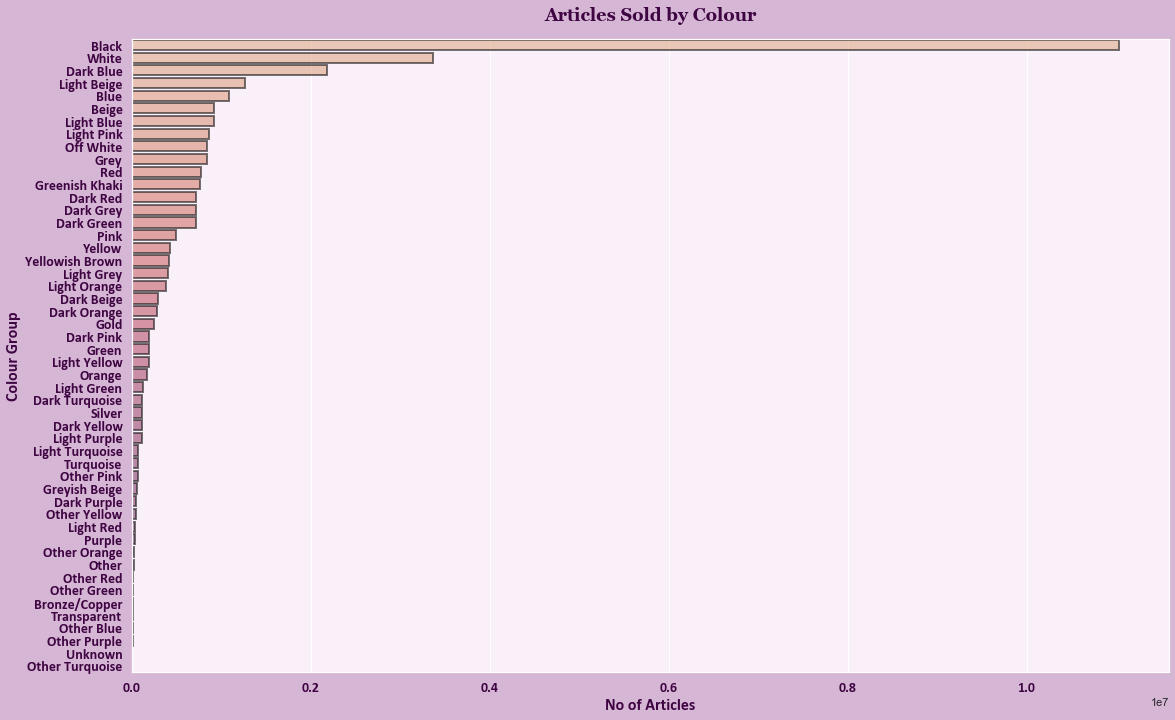

In [44]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
sns.barplot(data=depa,y="colour_group_name", x="article_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
plt.tight_layout()
ttl = ax.set_title('Articles Sold by Colour', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('Colour Group', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Black color garments are highly demanded by the customers

### Articles Sold by Garment

In [45]:
dep3=dep1.groupby(['garment_group_name'])['article_id'].count().reset_index()
depa1 = dep3.sort_values(['article_id'], ascending=False)

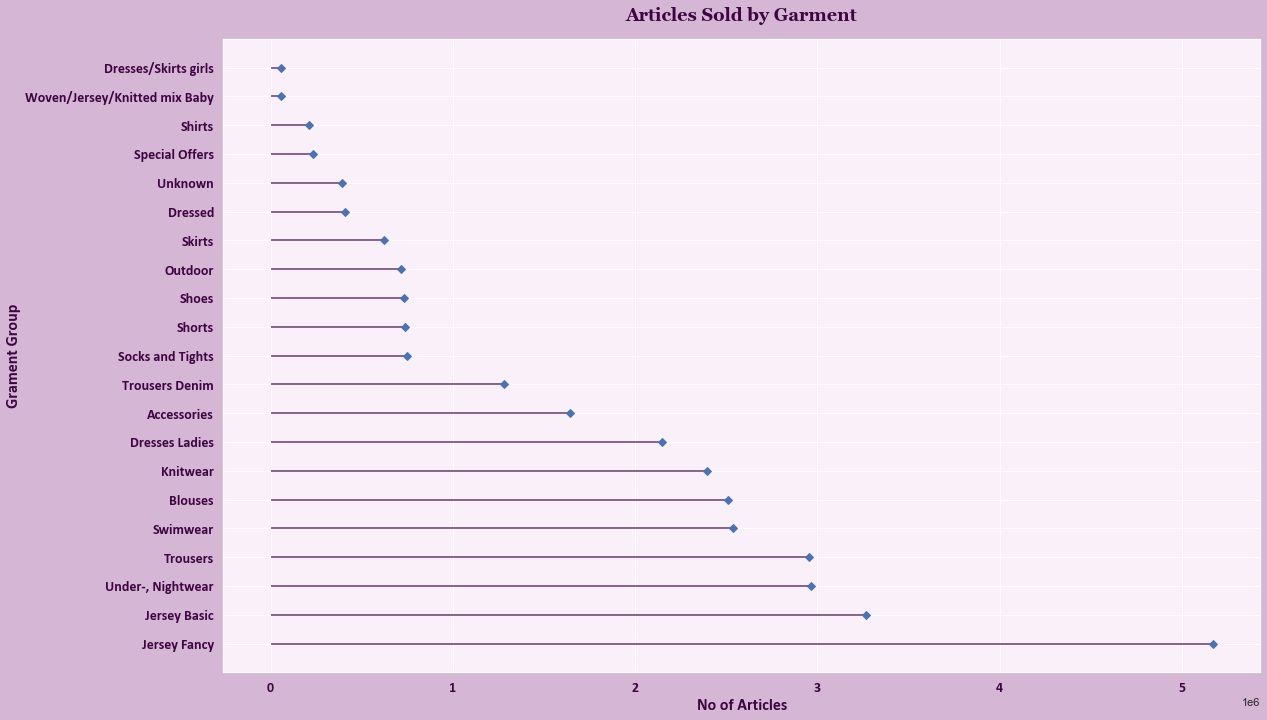

In [46]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
plt.hlines(data=depa1,y="garment_group_name",xmin=0,xmax="article_id",alpha = 0.6, edgecolor = 'k', linewidth = 2,color='#3e0542')
plt.plot(depa1['article_id'], depa1['garment_group_name'], "D")
 
plt.tight_layout()
ttl = ax.set_title('Articles Sold by Garment', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('Grament Group', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Jersey fancy and basic are the most frequent garment for customers.

#### Fashion News Frequency

In [47]:
cus=pd.DataFrame(customers, columns = ['club_member_status','fashion_news_frequency','customer_id'])
trans= pd.DataFrame(transactions, columns = ['customer_id'])

In [48]:
custran = pd.merge(cus,trans, how='right', on='customer_id')

In [49]:
ct1=custran.groupby(['fashion_news_frequency'])['customer_id'].count().reset_index()
ct2 = ct1.sort_values(['customer_id'], ascending=False)

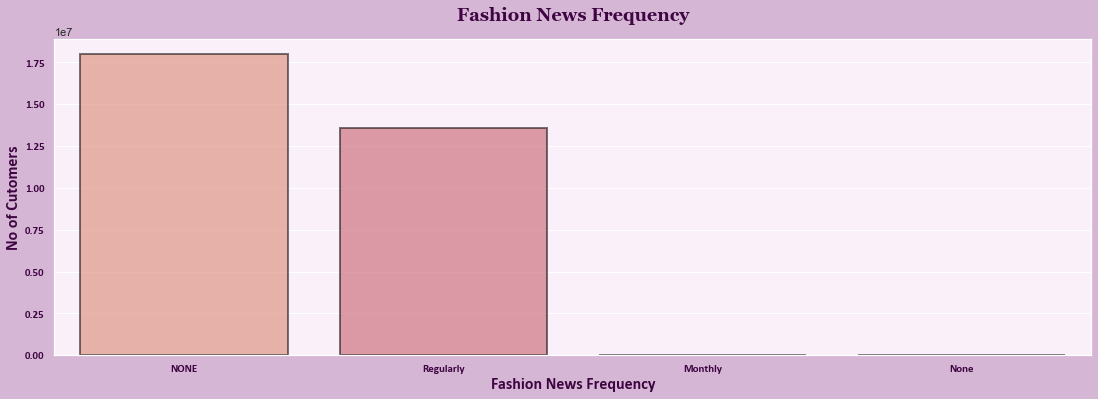

In [50]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,8)
sns.barplot(data=ct2,x="fashion_news_frequency", y="customer_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
ttl = ax.set_title('Fashion News Frequency', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Cutomers', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('Fashion News Frequency', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

most of the customers do not recieve ang regular update about fashion news.

### Club Member Status

In [51]:
cms1=custran.groupby(['club_member_status'])['customer_id'].count().reset_index()
cms2 = cms1.sort_values(['customer_id'], ascending=False)

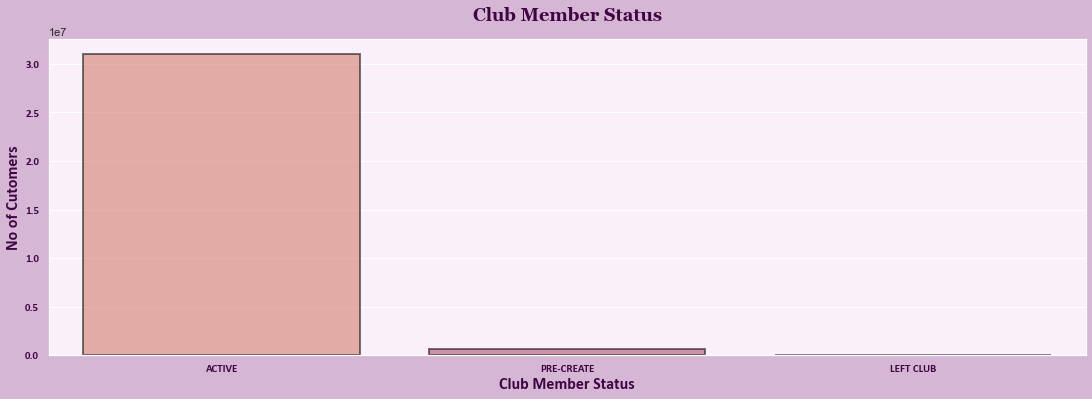

In [52]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,8)
sns.barplot(data=cms2,x="club_member_status", y="customer_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
ttl = ax.set_title('Club Member Status', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Cutomers', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('Club Member Status', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Most of the customers have an active membership status,only few are in pre-create status and no one with left club status.

### Word Cloud for Description

In [53]:
prod_desc = articles[articles.detail_desc.notnull()].detail_desc.sample(5000).values

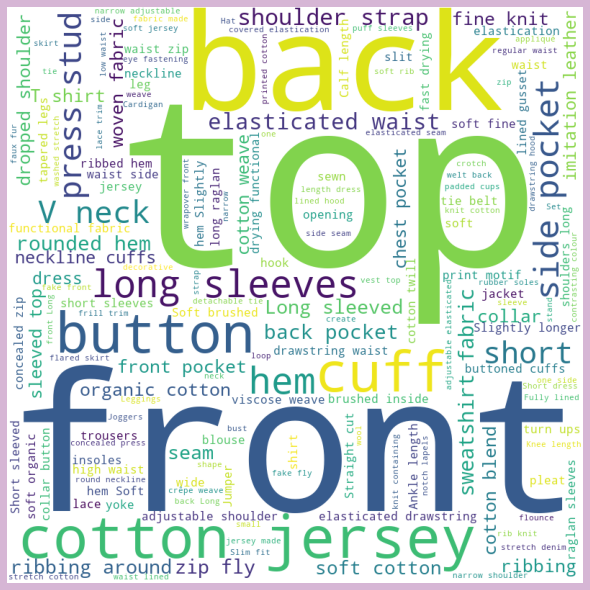

In [54]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      stopwords = stopwords,).generate(' '.join(prod_desc)) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = '#d6b6d5') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

### Mean Price for Articles

In [55]:
articles_for_merge = articles[['article_id', 'product_group_name']]

In [56]:
articles_for_merge = transactions[['article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

In [57]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'], format='%Y/%m/%d')

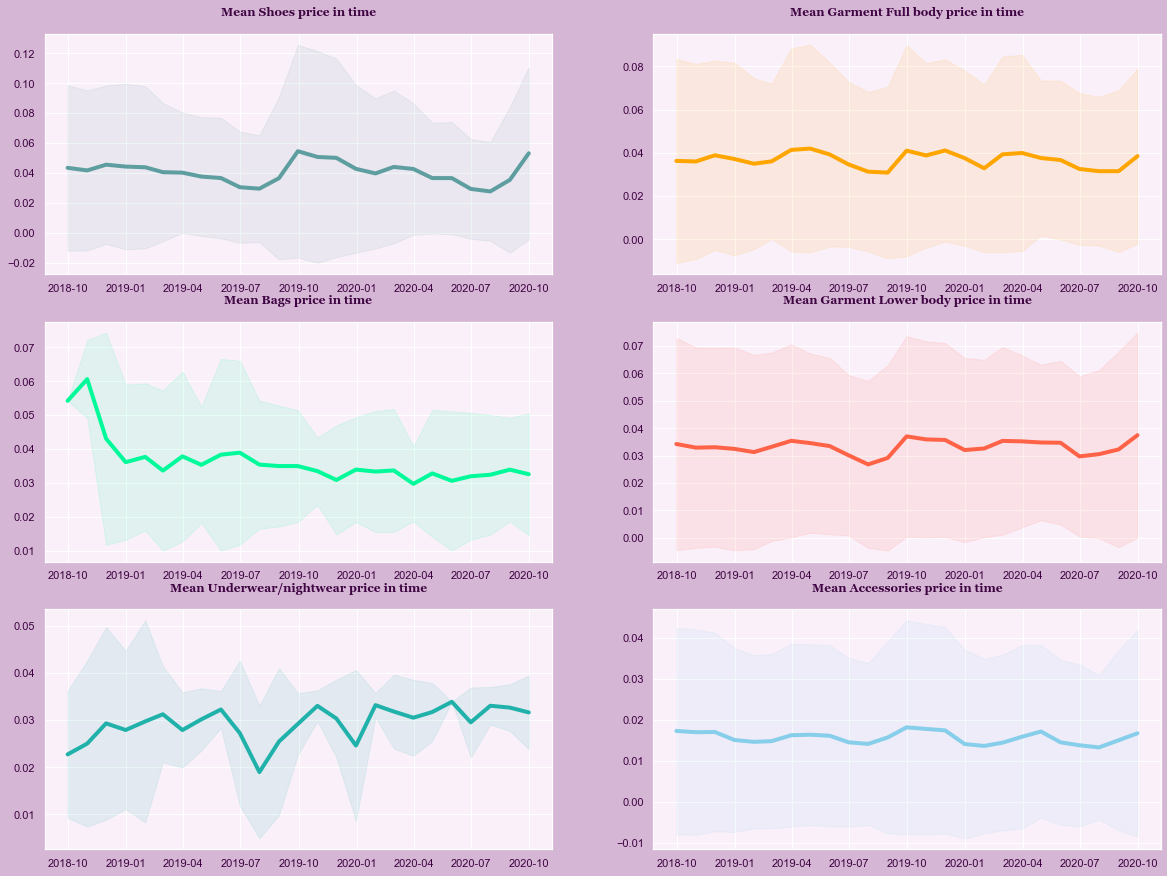

In [58]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear','Accessories']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen','skyblue']
k = 0
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(3, 2, figsize=(20, 15),facecolor = '#d6b6d5')

for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time',fontsize=12, pad=18, color=font_color, **csfont,fontweight = 'bold')
            ax[i, j].tick_params(axis='x', colors=font_color)
            ax[i, j].tick_params(axis='y', colors=font_color)
           
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

### Top 5 Articles with maximum price

In [59]:
max_price_ids = transactions[transactions.t_dat==transactions.t_dat.max()].sort_values('price', ascending=False).iloc[:5][['article_id', 'price']]

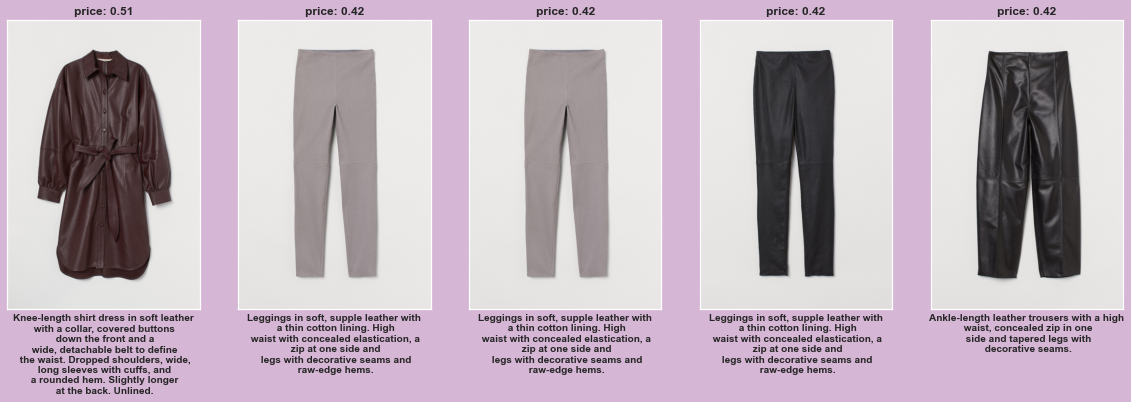

In [60]:
f, ax = plt.subplots(1, 5, figsize=(20,10),facecolor = '#d6b6d5')
i = 0
for _, data in max_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 5 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'D:/VIEH INTERNSHIP H&M/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.2f}',fontweight = 'bold')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=10,fontweight = 'bold')
    i += 1
plt.show()

#### Top 5 Articles with minimum price

In [61]:
min_price_ids = transactions[transactions.t_dat==transactions.t_dat.min()].sort_values('price', ascending=True).iloc[:5][['article_id', 'price']]

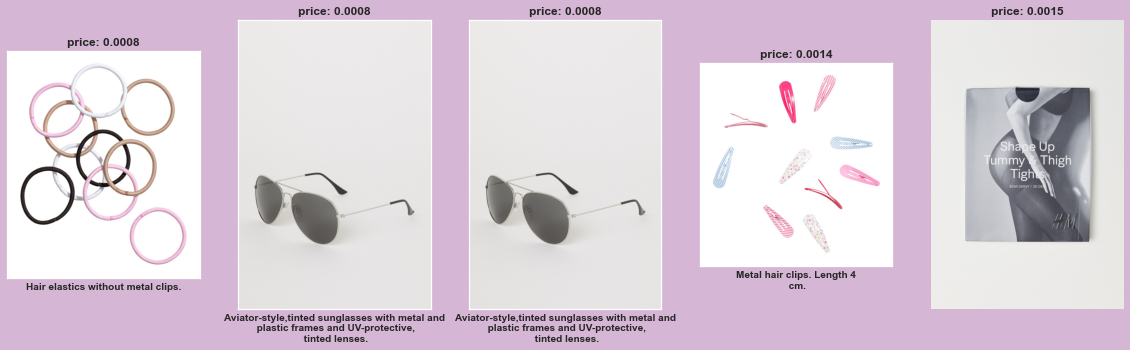

In [62]:
f, ax = plt.subplots(1, 5, figsize=(20,10),facecolor = '#d6b6d5')
i = 0
for _, data in min_price_ids.iterrows():
    desc = articles[articles['article_id'] == data['article_id']]['detail_desc'].iloc[0]
    desc_list = desc.split(' ')
    for j, elem in enumerate(desc_list):
        if j > 0 and j % 4 == 0:
            desc_list[j] = desc_list[j] + '\n'
    desc = ' '.join(desc_list)
    img = mpimg.imread(f'D:/VIEH INTERNSHIP H&M/images/0{str(data.article_id)[:2]}/0{int(data.article_id)}.jpg')
    ax[i].imshow(img)
    ax[i].set_title(f'price: {data.price:.4f}',fontweight = 'bold')
    ax[i].set_xlabel(desc, fontsize=10,fontweight = 'bold')
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    i += 1
plt.axis('off')
plt.show()

# Analytics 

In [63]:
import numpy as np 
import pandas as pd
from pandasql import sqldf

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')
sns.set_style("whitegrid")
sns.despine()
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

<Figure size 432x288 with 0 Axes>

Articles dataframe analysis



In [64]:
df_a = pd.read_csv("articles.csv")
df_t = pd.read_csv("transactions_train.csv")
df_c = pd.read_csv("customers.csv")

Articles data frame analysis

In [65]:
df_a.head(1)


article_id  product_code  prod_name  product_type_no product_type_name  \
0   108775015        108775  Strap top              253          Vest top   

   product_group_name  graphical_appearance_no graphical_appearance_name  \
0  Garment Upper body                  1010016                     Solid   

   colour_group_code colour_group_name  ...  department_name index_code  \
0                  9             Black  ...     Jersey Basic          A   

   index_name index_group_no  index_group_name section_no  \
0  Ladieswear              1        Ladieswear         16   

             section_name garment_group_no  garment_group_name  \
0  Womens Everyday Basics             1002        Jersey Basic   

                               detail_desc  
0  Jersey top with narrow shoulder straps.  

[1 rows x 25 columns]

In [66]:
df_a.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [67]:
print(f"The dataframe articles has {len(df_a)} rows")

The dataframe articles has 105542 rows


To filter the columns, we will use SQL like code through SQL-DF library.

In [68]:
df_a = sqldf("""SELECT article_id, prod_name, product_type_name, product_group_name, colour_group_name, index_name
            FROM df_a
            """)

In [70]:
df_a.head()

article_id          prod_name product_type_name  product_group_name  \
0   108775015          Strap top          Vest top  Garment Upper body   
1   108775044          Strap top          Vest top  Garment Upper body   
2   108775051      Strap top (1)          Vest top  Garment Upper body   
3   110065001  OP T-shirt (Idro)               Bra           Underwear   
4   110065002  OP T-shirt (Idro)               Bra           Underwear   

  colour_group_name        index_name  
0             Black        Ladieswear  
1             White        Ladieswear  
2         Off White        Ladieswear  
3             Black  Lingeries/Tights  
4             White  Lingeries/Tights

Transactions dataframe analysis

In [71]:
df_t.head(1)

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   

      price  sales_channel_id  
0  0.050831                 2

In [72]:
df_t.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [73]:
print(f"The dataframe Transactions has {len(df_t)} rows")

The dataframe Transactions has 31788324 rows


The dataframe Transactions has 31788324 rows

The Transactions dataframe has more than 31 million rows: in order to save memory, we decide to drop some columns and keep only "customer_id", "article_id", "price".

In [74]:
df_t = df_t[["customer_id", "article_id", "price"]]

Transactions analysis

In [75]:
df_sold_qty = df_t["article_id"].value_counts()
df_sold_qty

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: article_id, Length: 104547, dtype: int64

In [76]:
df_sold_qty=df_sold_qty.reset_index()
df_sold_qty.rename(columns = {"article_id":"sold_qty","index":"article_id"}, inplace=True)
df_sold_qty.head()

article_id  sold_qty
0   706016001     50287
1   706016002     35043
2   372860001     31718
3   610776002     30199
4   759871002     26329

In [77]:
df_sold_qty

article_id  sold_qty
0        706016001     50287
1        706016002     35043
2        372860001     31718
3        610776002     30199
4        759871002     26329
...            ...       ...
104542   520736002         1
104543   619777003         1
104544   586904003         1
104545   512385003         1
104546   533261032         1

[104547 rows x 2 columns]

In [78]:
df_sold_qty["sold_qty"].describe()

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
Name: sold_qty, dtype: float64

Summary statistics on the sold quantities:

there are 105000 different articles in the transactions.
There are items which have been sold only once
25% of sold products, have been sold 14 or less times
50% were sold 65 or less times
75% were sold 286 or less times,
The most sold item have been sold 50287 times.

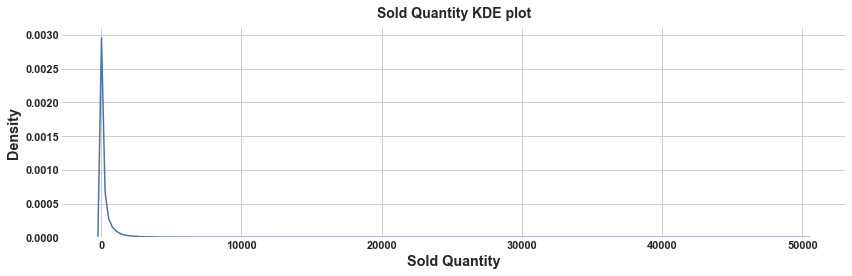

In [79]:
plt.figure(figsize=(12,4))
plt.title("Sold Quantity KDE plot")
sns.kdeplot(df_sold_qty["sold_qty"])
plt.xlabel("Sold Quantity")
plt.show()

distribution is heavily right skewed.

In [81]:
df_sold_qty["sold_qty"].quantile([0.90,0.95,0.99,0.999])

0.900     793.000
0.950    1318.000
0.990    3185.080
0.999    9282.534
Name: sold_qty, dtype: float64

very small minority of items that sold more than 10k times (just the 0.001%)

Q1 - Which are the TOP 100 articles in terms of sold quantity?

In [82]:
top_100_sold = df_sold_qty.iloc[:100]
top_100_sold.head()

article_id  sold_qty
0   706016001     50287
1   706016002     35043
2   372860001     31718
3   610776002     30199
4   759871002     26329

In [83]:
top_100_details = sqldf("""SELECT *
        FROM top_100_sold t
        INNER JOIN df_a a
        on t.article_id = a.article_id
    """)

In [84]:
top_100_details.head()

article_id  sold_qty  article_id                 prod_name  \
0   706016001     50287   706016001  Jade HW Skinny Denim TRS   
1   706016002     35043   706016002  Jade HW Skinny Denim TRS   
2   372860001     31718   372860001        7p Basic Shaftless   
3   610776002     30199   610776002                 Tilly (1)   
4   759871002     26329   759871002                Tilda tank   

  product_type_name  product_group_name colour_group_name        index_name  
0          Trousers  Garment Lower body             Black           Divided  
1          Trousers  Garment Lower body        Light Blue           Divided  
2             Socks      Socks & Tights             Black  Lingeries/Tights  
3           T-shirt  Garment Upper body             Black        Ladieswear  
4          Vest top  Garment Upper body             Black           Divided

In [85]:
top_100_details.iloc[:30]


article_id  sold_qty  article_id                    prod_name  \
0    706016001     50287   706016001     Jade HW Skinny Denim TRS   
1    706016002     35043   706016002     Jade HW Skinny Denim TRS   
2    372860001     31718   372860001           7p Basic Shaftless   
3    610776002     30199   610776002                    Tilly (1)   
4    759871002     26329   759871002                   Tilda tank   
5    464297007     25025   464297007     Greta Thong Mynta Low 3p   
6    372860002     24458   372860002           7p Basic Shaftless   
7    610776001     22451   610776001                    Tilly (1)   
8    399223001     22236   399223001      Curvy Jeggings HW Ankle   
9    706016003     21241   706016003     Jade HW Skinny Denim TRS   
10   720125001     21063   720125001            SUPREME RW tights   
11   156231001     21013   156231001                Box 4p Tights   
12   562245046     20719   562245046               Luna skinny RW   
13   562245001     20464   562245001               Luna skinny RW   
14   351484002     20415   351484002            Lazer Razer Brief   
15   399256001     20242   399256001    Skinny Ankle R.W Brooklyn   
16   673396002     19834   673396002                Ringo hipbelt   
17   568601006     19379   568601006              Mariette Blazer   
18   448509014     19216   448509014    Perrie Slim Mom Denim TRS   
19   673677002     19143   673677002              Henry polo. (1)   
20   751471001     18263   751471001          Pluto RW slacks (1)   
21   608776002     17886   608776002             Scallop 5p Socks   
22   160442007     17866   160442007             3p Sneaker Socks   
23   688537004     17754   688537004  Simple as that Cheeky Tanga   
24   573716012     16690   573716012              Kanta slacks RW   
25   158340001     16533   158340001   Highwaist 30 den 1p Tights   
26   590928001     15906   590928001            New Girl Push Top   
27   579541001     15612   579541001            Calista cardigan.   
28   706016015     15571   706016015     Jade HW Skinny Denim TRS   
29   554450001     15245   554450001    Julia RW Skinny Denim TRS   

   product_type_name  product_group_name colour_group_name          index_name  
0           Trousers  Garment Lower body             Black             Divided  
1           Trousers  Garment Lower body        Light Blue             Divided  
2              Socks      Socks & Tights             Black    Lingeries/Tights  
3            T-shirt  Garment Upper body             Black          Ladieswear  
4           Vest top  Garment Upper body             Black             Divided  
5   Underwear bottom           Underwear             Black    Lingeries/Tights  
6              Socks      Socks & Tights             White    Lingeries/Tights  
7            T-shirt  Garment Upper body             White          Ladieswear  
8           Trousers  Garment Lower body             Black             Divided  
9           Trousers  Garment Lower body         Dark Blue             Divided  
10   Leggings/Tights  Garment Lower body             Black               Sport  
11  Underwear Tights      Socks & Tights             Black    Lingeries/Tights  
12          Trousers  Garment Lower body             Black          Ladieswear  
13          Trousers  Garment Lower body             Black          Ladieswear  
14   Swimwear bottom            Swimwear             Black    Lingeries/Tights  
15          Trousers  Garment Lower body             Black          Ladieswear  
16              Belt         Accessories             Black  Ladies Accessories  
17            Blazer  Garment Upper body             Black          Ladieswear  
18          Trousers  Garment Lower body              Blue             Divided  
19           Sweater  Garment Upper body             Black          Ladieswear  
20          Trousers  Garment Lower body             Black          Ladieswear  
21             Socks      Socks & Tights             Black    Lingeries/Tights  
2

In [86]:
top_100_details.iloc[:30].groupby("prod_name")["sold_qty"].sum()

prod_name
3p Sneaker Socks                17866
7p Basic Shaftless              56176
Box 4p Tights                   21013
Calista cardigan.               15612
Curvy Jeggings HW Ankle         22236
Greta Thong Mynta Low 3p        25025
Henry polo. (1)                 19143
Highwaist 30 den 1p Tights      16533
Jade HW Skinny Denim TRS       122142
Julia RW Skinny Denim TRS       15245
Kanta slacks RW                 16690
Lazer Razer Brief               20415
Luna skinny RW                  41183
Mariette Blazer                 19379
New Girl Push Top               15906
Perrie Slim Mom Denim TRS       19216
Pluto RW slacks (1)             18263
Ringo hipbelt                   19834
SUPREME RW tights               21063
Scallop 5p Socks                17886
Simple as that Cheeky Tanga     17754
Skinny Ankle R.W Brooklyn       20242
Tilda tank                      26329
Tilly (1)                       52650
Name: sold_qty, dtype: int64

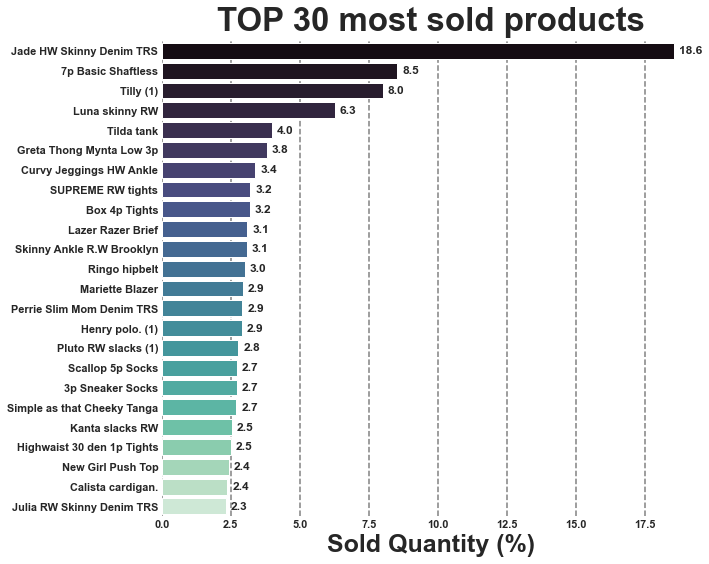

In [87]:
plt.figure(figsize=(10,8))
plt.title("TOP 30 most sold products", fontsize=33, fontweight="bold")
no=30
g = sns.barplot(y="prod_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("prod_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=12)
plt.xlabel("Sold Quantity (%)", size=25, fontweight="bold")
plt.ylabel("")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

The trousers "Jade HW Skinny Denim TRS " is responsible for almost 19% of all sold products.
the TOP 4 of most sold items, is responsible for almost 40% of the TOP 100 sold products.

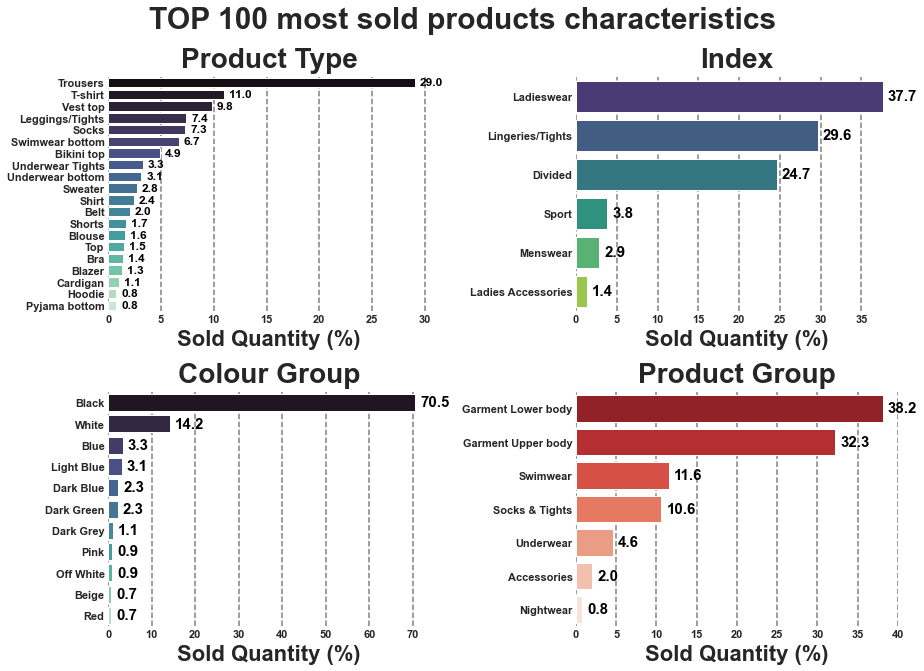

In [88]:
fig, ax = plt.subplots(2,2, figsize=(13,9.5))
plt.suptitle("TOP 100 most sold products characteristics", fontweight="bold",fontsize=30)

no=100

g = sns.barplot(y="product_type_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("product_type_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=12, color="black")
ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[0,0].set_title("Product Type",fontweight="bold",fontsize=28)
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="index_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("index_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,1],palette="viridis", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[0,1].set_title("Index",fontweight="bold",fontsize=28)
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="colour_group_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("colour_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[1,0].set_title("Colour Group",fontweight="bold",fontsize=28)
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("product_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,1],palette="Reds_r", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Sold Quantity (%)", size=22, fontweight="bold")
ax[1,1].set_title("Product Group",fontweight="bold",fontsize=28)
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()

plt.show() 

Among the TOP 100 of solds products:



Almost 30% of sold products are trousers
38% is Ladieswear
30% is Lingeries/Tights
Over 70% are black colored
Almost 40% are related to lower body

Q2 - Are there articles that have been sold only once?

In [90]:
df_sold_qty["sold_qty"].where(lambda x: x==1).dropna() 
#top 15% products

100056    1.0
100057    1.0
100058    1.0
100059    1.0
100060    1.0
         ... 
104542    1.0
104543    1.0
104544    1.0
104545    1.0
104546    1.0
Name: sold_qty, Length: 4491, dtype: float64

In [92]:
df_sold_qty["sold_qty"].where(lambda x: x==1).dropna().to_frame()

sold_qty
100056       1.0
100057       1.0
100058       1.0
100059       1.0
100060       1.0
...          ...
104542       1.0
104543       1.0
104544       1.0
104545       1.0
104546       1.0

[4491 rows x 1 columns]

Almost 4500 different items have been sold just once. Since in the "Transactions" dataframe there are around 100000 different items, this means that among the transactions, almost 4.5% of the products have only been sold once.







items that sold only once

In [94]:
worst_sold = df_sold_qty.tail(4491)

In [95]:
worst_sold

article_id  sold_qty
100056   796990001         1
100057   824983007         1
100058   597649002         1
100059   533386001         1
100060   685409001         1
...            ...       ...
104542   520736002         1
104543   619777003         1
104544   586904003         1
104545   512385003         1
104546   533261032         1

[4491 rows x 2 columns]

In [96]:
worst_details = sqldf("""SELECT *
        FROM worst_sold t
        INNER JOIN df_a a
        on t.article_id = a.article_id
    """)

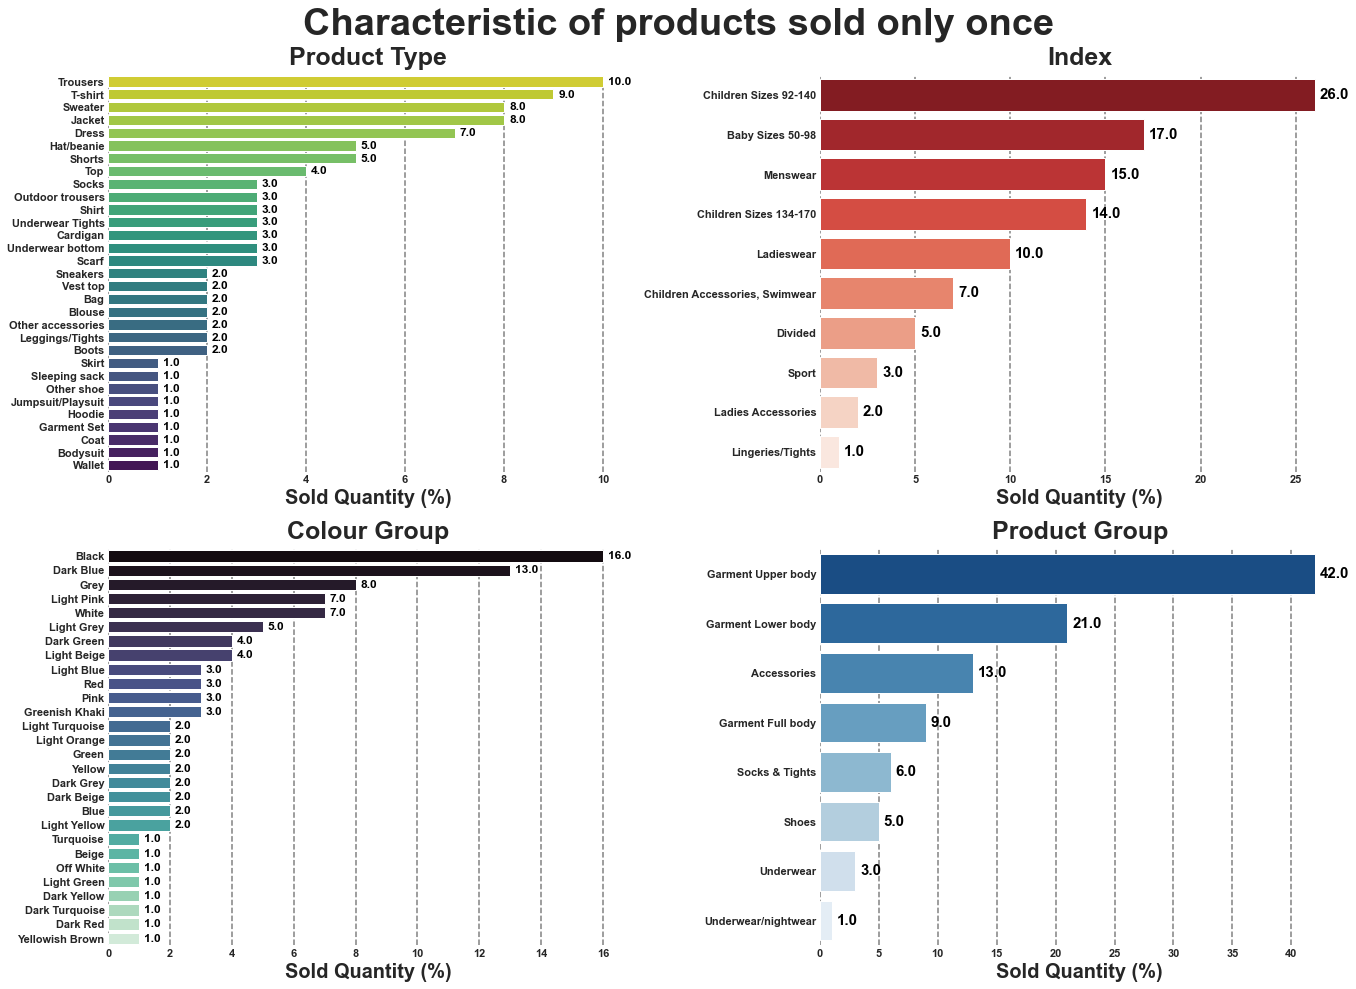

In [97]:
fig, ax = plt.subplots(2,2, figsize=(19,14))
plt.suptitle("Characteristic of products sold only once", size=38, fontweight="bold")

no=100

g = sns.barplot(y="product_type_name", x="sold_qty(%)", data=worst_details.iloc[:no].groupby("product_type_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,0],palette="viridis_r", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=12, color="black")
ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[0,0].set_title("Product Type", size=25, fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="index_name", x="sold_qty(%)", data=worst_details.iloc[:no].groupby("index_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,1],palette="Reds_r", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[0,1].set_title("Index", size=25, fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="colour_group_name", x="sold_qty(%)", data=worst_details.iloc[:no].groupby("colour_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=12, color="black")
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[1,0].set_title("Colour Group", size=25, fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="sold_qty(%)", data=worst_details.iloc[:no].groupby("product_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,1],palette="Blues_r", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Sold Quantity (%)", size=20, fontweight="bold")
ax[1,1].set_title("Product Group", size=25, fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

fig.tight_layout()

plt.show() 


almost 60% of only sold once items are for children and baby





Q3 - Which are the TOP 100 articles that generated most earnings for the company?





The earnings can be calculated by multiplying the price of each product by its total sold quanity.

In [98]:
df_t_p_a = df_t[["price","article_id"]]
df_t_p_a

price  article_id
0         0.050831   663713001
1         0.030492   541518023
2         0.015237   505221004
3         0.016932   685687003
4         0.016932   685687004
...            ...         ...
31788319  0.059305   929511001
31788320  0.042356   891322004
31788321  0.043203   918325001
31788322  0.006763   833459002
31788323  0.033881   898573003

[31788324 rows x 2 columns]

In [99]:
df_t_p_a[df_t_p_a['article_id']==706016001]

price  article_id
3151821   0.027102   706016001
3152302   0.033881   706016001
3158922   0.033881   706016001
3167536   0.033881   706016001
3171716   0.033881   706016001
...            ...         ...
31787887  0.033881   706016001
31787948  0.033881   706016001
31788086  0.033881   706016001
31788147  0.033881   706016001
31788148  0.033881   706016001

[50287 rows x 2 columns]

In [100]:
df_prices = df_t[["price","article_id"]].groupby("article_id").sum().sort_values(by="price", ascending=False)

In [101]:
df_prices

price
article_id             
706016001   1631.732102
706016002   1136.321085
568601006    939.268593
448509014    781.478390
706016003    692.195915
...                 ...
407663007      0.000678
520431003      0.000678
405310006      0.000475
569052001      0.000441
344625009      0.000424

[104547 rows x 1 columns]

In [102]:
df_prices.rename(columns={"price":"earning"}, inplace=True)
df_prices = df_prices.reset_index()

In [103]:
df_prices


article_id      earning
0        706016001  1631.732102
1        706016002  1136.321085
2        568601006   939.268593
3        448509014   781.478390
4        706016003   692.195915
...            ...          ...
104542   407663007     0.000678
104543   520431003     0.000678
104544   405310006     0.000475
104545   569052001     0.000441
104546   344625009     0.000424

[104547 rows x 2 columns]

most earnings generated by a product is 1631

In [104]:
print("Number of different sold articles:",len(df_prices["earning"]))
print("Total Earnings:",df_prices["earning"].sum())

Number of different sold articles: 104547
Total Earnings: 884645.974050846


In [105]:
for i in [10,50,100,200,300,400,1000]:
    print("The TOP {} of products that generate most earnings, account for the {:.2f} % of total earnings".format(i, df_prices["earning"].iloc[:i].sum() / df_prices["earning"].iloc[:].sum() * 100) ) 

The TOP 10 of products that generate most earnings, account for the 0.94 % of total earnings
The TOP 50 of products that generate most earnings, account for the 2.74 % of total earnings
The TOP 100 of products that generate most earnings, account for the 4.36 % of total earnings
The TOP 200 of products that generate most earnings, account for the 6.75 % of total earnings
The TOP 300 of products that generate most earnings, account for the 8.60 % of total earnings
The TOP 400 of products that generate most earnings, account for the 10.20 % of total earnings
The TOP 1000 of products that generate most earnings, account for the 17.50 % of total earnings


TOP 100 of over 100000 products, generates around 5% of the total earnings. It can be interesting to check these products names and characteristics

In [106]:
top_100_prices=df_prices.iloc[:100]

In [107]:
top_100_price_details = sqldf("""SELECT *
        FROM top_100_prices t
        INNER JOIN df_a a
        on t.article_id = a.article_id""")

In [109]:
top_100_price_details.head()

article_id      earning  article_id                  prod_name  \
0   706016001  1631.732102   706016001   Jade HW Skinny Denim TRS   
1   706016002  1136.321085   706016002   Jade HW Skinny Denim TRS   
2   568601006   939.268593   568601006            Mariette Blazer   
3   448509014   781.478390   448509014  Perrie Slim Mom Denim TRS   
4   706016003   692.195915   706016003   Jade HW Skinny Denim TRS   

  product_type_name  product_group_name colour_group_name  index_name  
0          Trousers  Garment Lower body             Black     Divided  
1          Trousers  Garment Lower body        Light Blue     Divided  
2            Blazer  Garment Upper body             Black  Ladieswear  
3          Trousers  Garment Lower body              Blue     Divided  
4          Trousers  Garment Lower body         Dark Blue     Divided

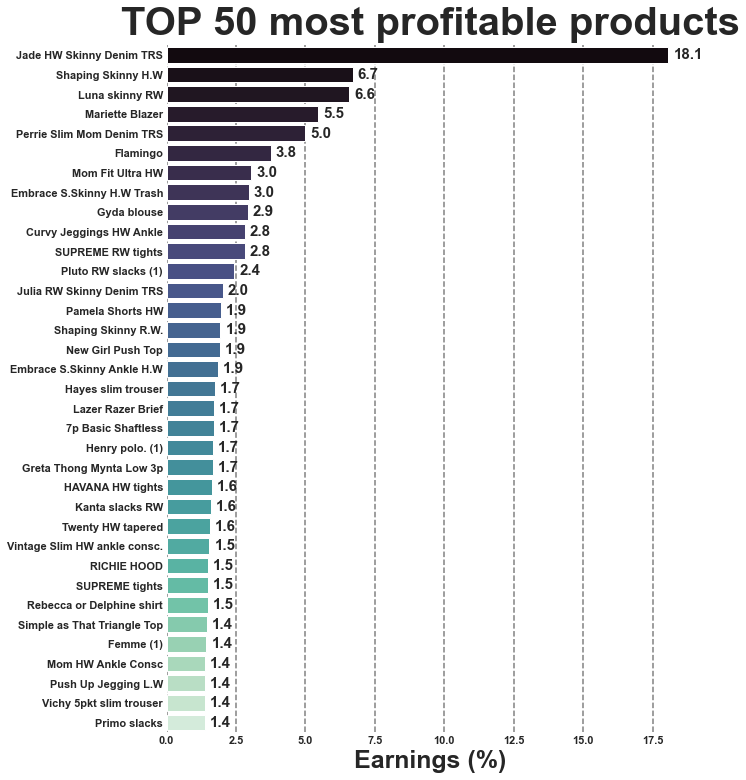

In [110]:
plt.figure(figsize=(10,11))
plt.title("TOP 50 most profitable products", size=40, fontweight="bold")
no=50
g = sns.barplot(y="prod_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("prod_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15)
plt.xlabel("Earnings (%)", size=25, fontweight="bold")
plt.ylabel("")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

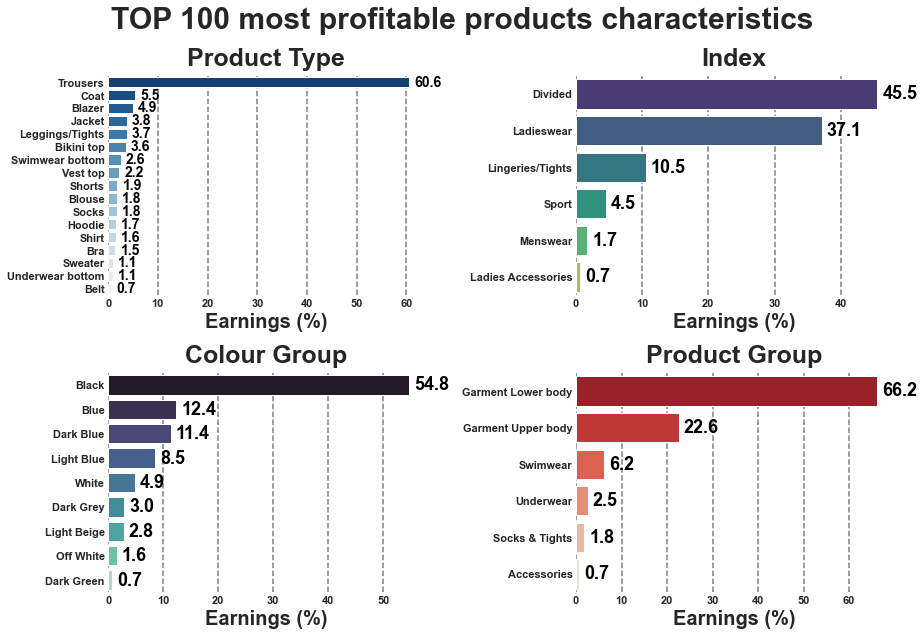

In [111]:
fig, ax = plt.subplots(2,2, figsize=(13,9))
plt.suptitle("TOP 100 most profitable products characteristics", fontweight="bold", fontsize=30)

no=100

g = sns.barplot(y="product_type_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("product_type_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0,0],palette="Blues_r", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=14, color="black")
ax[0,0].set_ylabel("")
ax[0,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,0].set_title("Product Type", size=25,fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="index_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("index_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0,1],palette="viridis", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', padding = 5, fontsize=18, color="black")
ax[0,1].set_ylabel("")
ax[0,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,1].set_title("Index", size=25,fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="colour_group_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("colour_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")
ax[1,0].set_ylabel("")
ax[1,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,0].set_title("Colour Group", size=25,fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="earning(%)", data=top_100_price_details.iloc[:no].groupby("product_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1,1],palette="Reds_r", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', padding=5, fontsize=18, color="black")
ax[1,1].set_ylabel("")
ax[1,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,1].set_title("Product Group", size=25,fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()

plt.show() 

Insights:

Over 60% of the TOP 100 products in terms of earnings are generated by selling trousers
Around 50% of these products are divided (a H&M teenage collection)
37% of the products are from the Ladieswear line
55% of the products are black
66.2% of the products are related to lower body

It is also important to notice that the TOP 100 most profitable products list do not exactly match the TOP 100 most sold products one, since lots of products that sells a lot in quantity are cheap, and so generate less earnings



Q4 - Which are articles that generated lower earnings for the company?

In [113]:
worst_100_prices=df_prices.iloc[-100:]

In [114]:
worst_100_price_details = sqldf("""SELECT *
        FROM worst_100_prices t
        INNER JOIN df_a a
        on t.article_id = a.article_id""")

In [115]:
worst_100_price_details.head()

article_id   earning  article_id               prod_name product_type_name  \
0   555293002  0.002136   555293002  Elin thin hair elastic       Hair string   
1   502262002  0.002119   502262002           Kelly mittens            Gloves   
2   585716001  0.002034   585716001          Festival dress             Dress   
3   807241091  0.001864   807241091            1p Fun Socks             Socks   
4   551413003  0.001695   551413003               DANTE set       Garment Set   

  product_group_name colour_group_name              index_name  
0        Accessories        Light Pink                 Divided  
1        Accessories        Light Grey        Baby Sizes 50-98  
2  Garment Full body      Light Orange  Children Sizes 134-170  
3     Socks & Tights        Light Grey        Lingeries/Tights  
4  Garment Full body        Light Blue        Baby Sizes 50-98

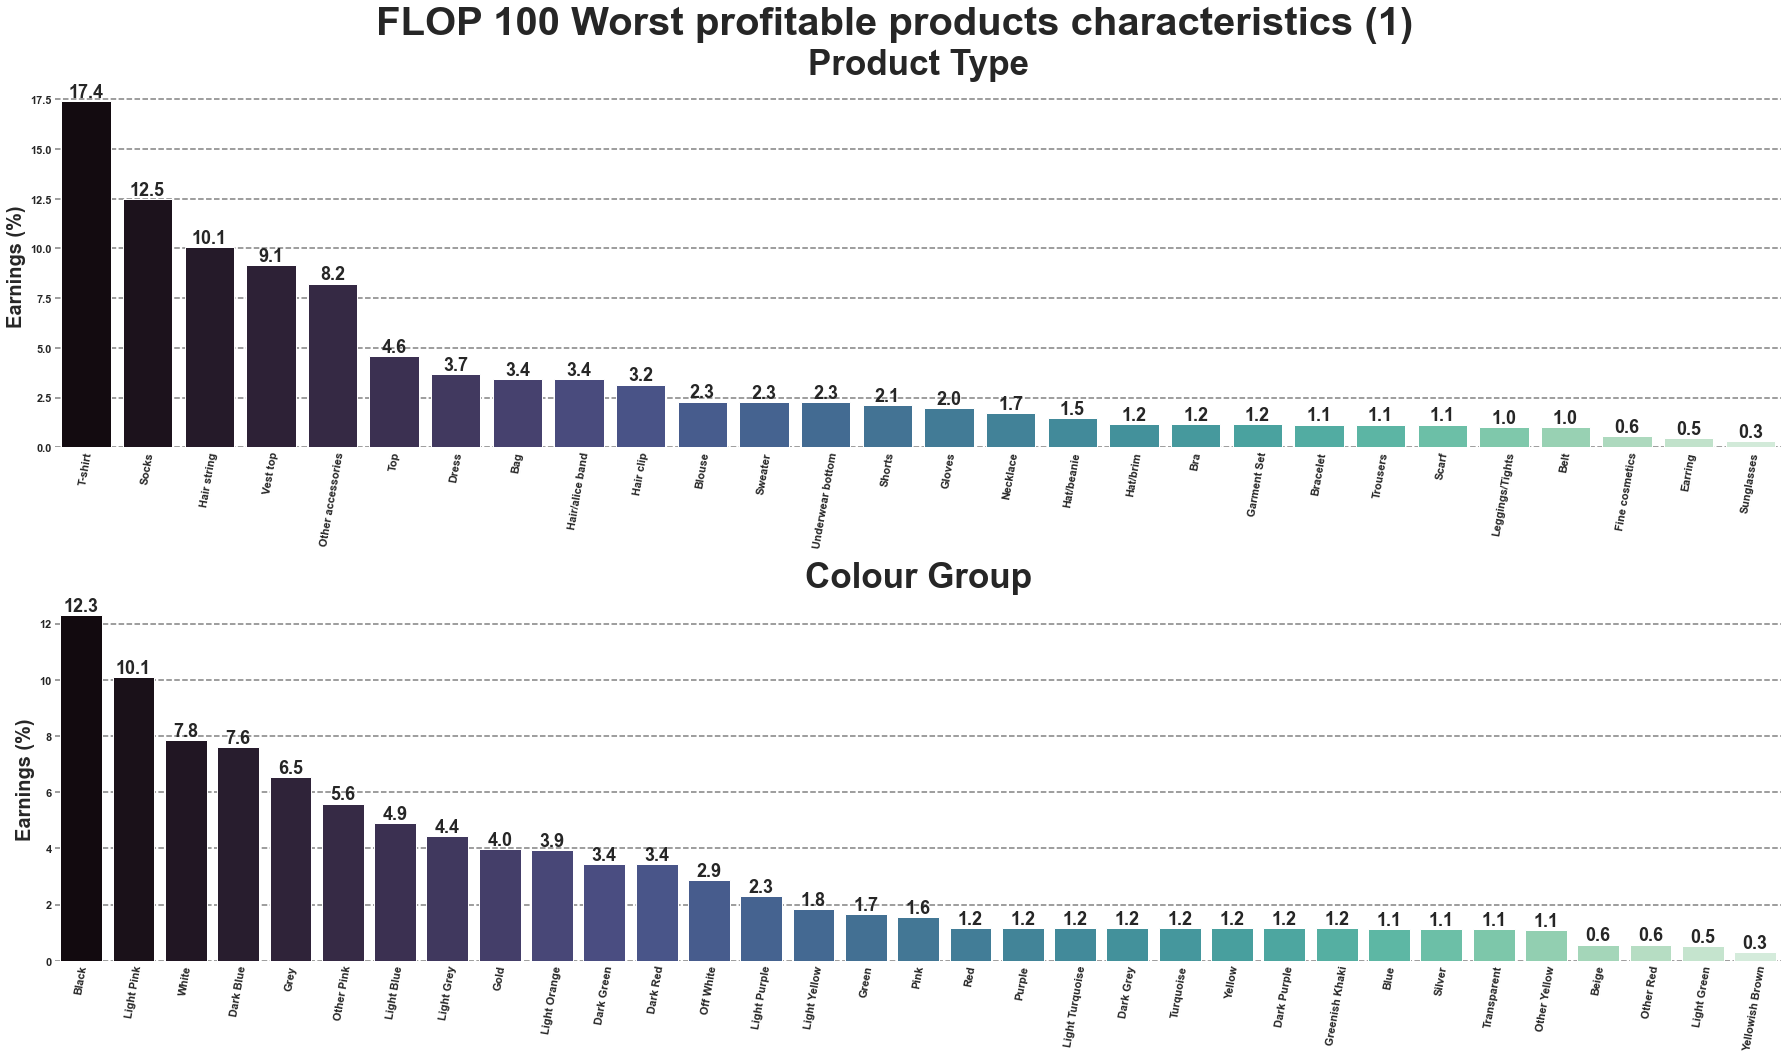

In [116]:
fig, ax = plt.subplots(2,1, figsize=(25,15))
plt.suptitle("FLOP 100 Worst profitable products characteristics (1)", fontsize=40 ,fontweight="bold")

no=100

g = sns.barplot(x="product_type_name", y="earning(%)", data=worst_100_price_details.iloc[:no].groupby("product_type_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=18)
ax[0].grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
ax[0].set_xlabel("")
ax[0].set_ylabel("Earnings (%)", size=20,fontweight="bold")
ax[0].set_xticklabels(g.get_xticklabels(), rotation=80)
ax[0].set_title("Product Type", size=35,fontweight="bold")

g = sns.barplot(x="colour_group_name", y="earning(%)", data=worst_100_price_details.iloc[:no].groupby("colour_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=18)
ax[1].set_ylabel("Earnings (%)", size=20,fontweight="bold")
ax[1].set_xlabel("")
ax[1].set_xticklabels(g.get_xticklabels(), rotation=80)
ax[1].set_title("Colour Group", size=35,fontweight="bold")
ax[1].grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)


fig.tight_layout()

plt.show() 

Insights:

17.4% of them are t shirts
12.5% are socks
There are quite a lot of accessories like hair bands, clips etc..

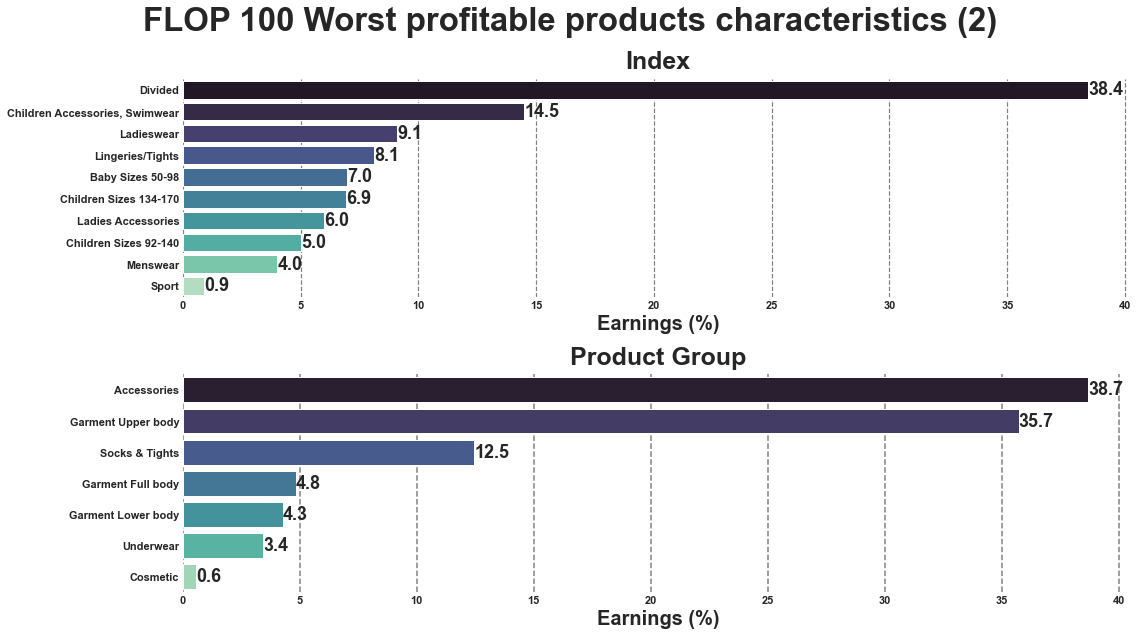

In [117]:
fig, ax = plt.subplots(2,1, figsize=(16,9))
plt.suptitle("FLOP 100 Worst profitable products characteristics (2)", fontsize=33 ,fontweight="bold")

no=100

g = sns.barplot(y="index_name", x="earning(%)", data=worst_100_price_details.iloc[:no].groupby("index_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=18)
ax[0].set_ylabel("")
ax[0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0].set_title("Index",size=25,fontweight="bold")
ax[0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.2)
             
g = sns.barplot(y="product_group_name", x="earning(%)", data=worst_100_price_details.iloc[:no].groupby("product_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1],palette="mako", ci=False)
for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=18)
ax[1].set_ylabel("")
ax[1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1].set_title("Product Group", size=25,fontweight="bold")
ax[1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
             
plt.tight_layout()
             
plt.show()

Customer Analayis

which customers are responsible for most purchases.

In [118]:
df_t.head()

customer_id  article_id     price
0  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001  0.050831
1  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023  0.030492
2  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004  0.015237
3  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003  0.016932
4  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004  0.016932

In [119]:
df_cust_prices = df_t[["customer_id", "price"]].groupby("customer_id").sum()

In [120]:
df_cust_prices.head()

price
customer_id                                                 
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d...  0.648983
0000423b00ade91418cceaf3b26c6af3dd342b51fd051ee...  2.601932
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad...  0.704780
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c...  0.060983
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe...  0.469695

In [121]:
df_cust_qty = df_t[["customer_id", "article_id"]].groupby("customer_id").count()

In [122]:
df_cust_qty.head()

article_id
customer_id                                                   
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d...          21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051ee...          86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad...          18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c...           2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe...          13

In [123]:
cust_qty_price = pd.merge(df_cust_prices, df_cust_qty, on='customer_id', how='inner')

In [124]:
cust_qty_price.head()

price  article_id
customer_id                                                             
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d...  0.648983          21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051ee...  2.601932          86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad...  0.704780          18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c...  0.060983           2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe...  0.469695          13

In [125]:
df_c.head()

customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [126]:
cust_details = pd.merge(cust_qty_price, df_c.drop("postal_code", axis=1), on='customer_id', how='inner')

In [127]:
cust_details.head()

customer_id     price  article_id  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.648983          21   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  2.601932          86   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0.704780          18   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  0.060983           2   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  0.469695          13   

    FN  Active club_member_status fashion_news_frequency   age  
0  NaN     NaN             ACTIVE                   NONE  49.0  
1  NaN     NaN             ACTIVE                   NONE  25.0  
2  NaN     NaN             ACTIVE                   NONE  24.0  
3  NaN     NaN             ACTIVE                   NONE  54.0  
4  1.0     1.0             ACTIVE              Regularly  52.0

In [128]:
print(f"In total there are {len(cust_details)} different customers")

In total there are 1362281 different customers


In total there are 1362281 different customers



Purchased Quantity by Customer Analysis

In [129]:
cust_details.article_id.describe()

count    1.362281e+06
mean     2.333463e+01
std      3.924225e+01
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      2.700000e+01
max      1.895000e+03
Name: article_id, dtype: float64

By calling the "describe" method on the "article_id" column, we can observe that:

The minimum purchased quantity by a single customer is 1
25% of customers Purchased 3 or less items
50% of customers Purchased 9 or less items
75% of customers Purchased 27 or less items
The maximum purchased quantity by a single customer is 1895 products

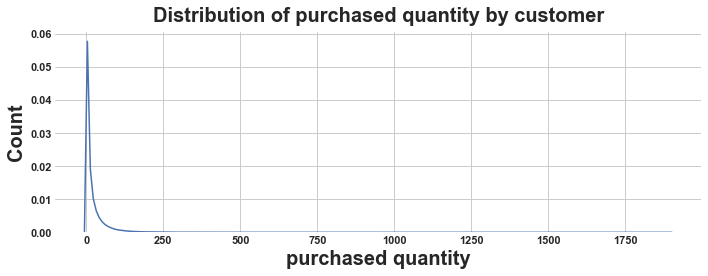

In [130]:
plt.figure(figsize=(10,4))
plt.title("Distribution of purchased quantity by customer", fontweight="bold", size=20)
sns.kdeplot(cust_details["article_id"])
plt.xlabel("purchased quantity",fontweight="bold", size=20)
plt.ylabel("Count",fontweight="bold", size=20)
plt.show()

analyze the age and other provided features of the customer to better find insights on the customers and their purchase behaviour.

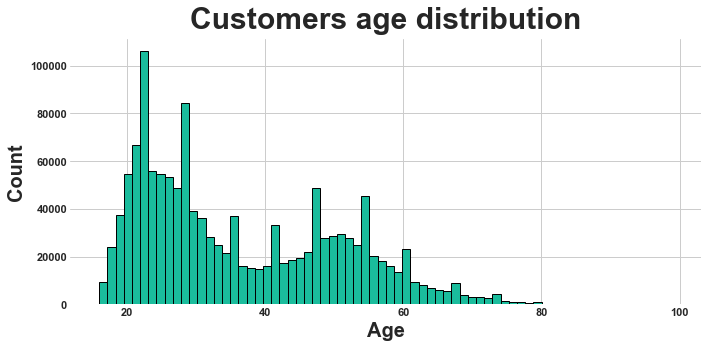

In [131]:
plt.figure(figsize=(10,5))
plt.title("Customers age distribution", fontweight="bold", size=30)
plt.hist(cust_details["age"], bins=70, edgecolor="black", color="#1ABC9C")
plt.xlabel("Age",fontweight="bold", size=20)
plt.ylabel("Count",fontweight="bold", size=20)
plt.show()

distribution of the age feature is bivariate. In order to create more effective plots, we will create a categorical column for age which divides the ages in age groups

Q5 - Which age group purchase more articles?

In [132]:
cust_details['age_groups'] = pd.cut(cust_details['age'], bins=[16, 20, 30, 40,50, 60, 70, float('Inf')], labels=['16-20', '20-30','30-40','40-50','50-60','60-70' , '70+'])

In [133]:
cust_details

customer_id     price  \
0        00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.648983   
1        0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  2.601932   
2        000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0.704780   
3        00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  0.060983   
4        00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  0.469695   
...                                                    ...       ...   
1362276  ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...  1.292356   
1362277  ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...  1.807322   
1362278  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...  0.788932   
1362279  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...  0.209203   
1362280  ffffd9ac14e89946416d80e791d064701994755c3ab686...  0.084729   

         article_id   FN  Active club_member_status fashion_news_frequency  \
0                21  NaN     NaN             ACTIVE                   NONE   
1                86  NaN     NaN             ACTIVE                   NONE   
2                18  NaN     NaN             ACTIVE                   NONE   
3                 2  NaN     NaN             ACTIVE                   NONE   
4                13  1.0     1.0             ACTIVE              Regularly   
...             ...  ...     ...                ...                    ...   
1362276          51  NaN     NaN             ACTIVE                   NONE   
1362277          84  NaN     NaN             ACTIVE                   NONE   
1362278          45  1.0     1.0             ACTIVE              Regularly   
1362279           7  1.0     1.0             ACTIVE              Regularly   
1362280           1  NaN     NaN         PRE-CREATE                   NONE   

          age age_groups  
0        49.0      40-50  
1        25.0      20-30  
2        24.0      20-30  
3        54.0      50-60  
4        52.0      50-60  
...       ...        ...  
1362276  24.0      20-30  
1362277  21.0      20-30  
1362278  21.0      20-30  
1362279  18.0      16-20  
1362280  65.0      60-70  

[1362281 rows x 9 columns]

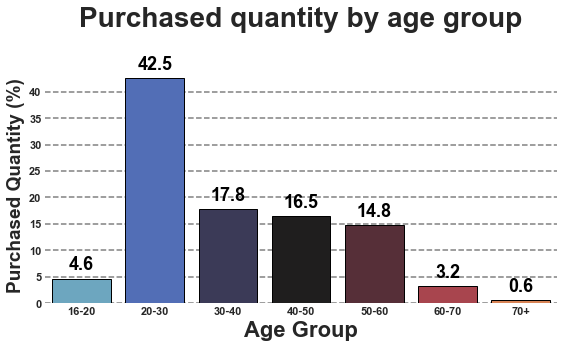

In [134]:
plt.figure(figsize=(8,5))
plt.title("Purchased quantity by age group\n", fontweight="bold", size=28)
g = sns.barplot(x="age_groups", y="Purchased Quantity(%)", data=cust_details.groupby("age_groups")["article_id"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('Purchased Quantity(%)').reset_index(), palette="icefire", edgecolor="black")
plt.xlabel("Age Group",fontweight="bold", size=22)
plt.ylabel("Purchased Quantity (%)",fontweight="bold", size=19)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

Insights:

Customers in the range 20-30 are responsible for more than 42% of the total purchased products.
Customers in the range 16-20. 60-70 and 70+ are responsible for the 8% of the total purchased products
Customers in the range 30-40, 40-50 and 50-60 are responsible for 16% of purchased quantity each.

Q6 - Which age group generates more earnings for the company?

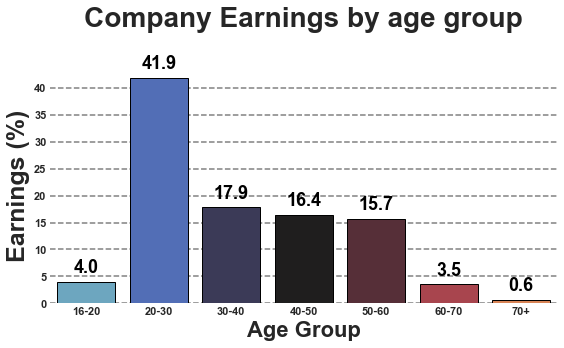

In [135]:
plt.figure(figsize=(8,5))
plt.title("Company Earnings by age group\n", fontweight="bold", size=28)
g = sns.barplot(x="age_groups", y="earning(%)", data=cust_details.groupby("age_groups")["price"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index(), palette="icefire",edgecolor="black")
plt.xlabel("Age Group",fontweight="bold", size=22)
plt.ylabel("Earnings (%)",fontweight="bold", size=25)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

Q7 - Do active customers on the fashion news purchase more articles?

In [136]:
cust_details

customer_id     price  \
0        00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.648983   
1        0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  2.601932   
2        000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0.704780   
3        00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  0.060983   
4        00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  0.469695   
...                                                    ...       ...   
1362276  ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...  1.292356   
1362277  ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...  1.807322   
1362278  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...  0.788932   
1362279  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...  0.209203   
1362280  ffffd9ac14e89946416d80e791d064701994755c3ab686...  0.084729   

         article_id   FN  Active club_member_status fashion_news_frequency  \
0                21  NaN     NaN             ACTIVE                   NONE   
1                86  NaN     NaN             ACTIVE                   NONE   
2                18  NaN     NaN             ACTIVE                   NONE   
3                 2  NaN     NaN             ACTIVE                   NONE   
4                13  1.0     1.0             ACTIVE              Regularly   
...             ...  ...     ...                ...                    ...   
1362276          51  NaN     NaN             ACTIVE                   NONE   
1362277          84  NaN     NaN             ACTIVE                   NONE   
1362278          45  1.0     1.0             ACTIVE              Regularly   
1362279           7  1.0     1.0             ACTIVE              Regularly   
1362280           1  NaN     NaN         PRE-CREATE                   NONE   

          age age_groups  
0        49.0      40-50  
1        25.0      20-30  
2        24.0      20-30  
3        54.0      50-60  
4        52.0      50-60  
...       ...        ...  
1362276  24.0      20-30  
1362277  21.0      20-30  
1362278  21.0      20-30  
1362279  18.0      16-20  
1362280  65.0      60-70  

[1362281 rows x 9 columns]

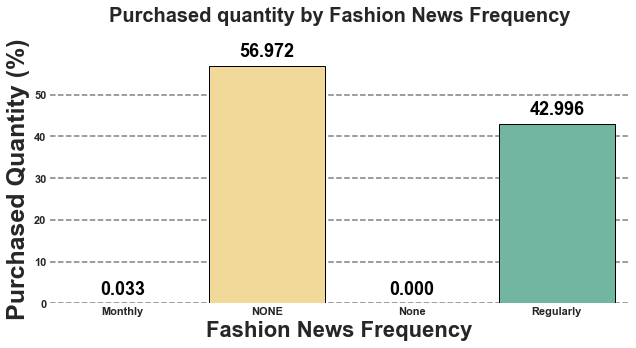

In [137]:
plt.figure(figsize=(9,5))
plt.title("Purchased quantity by Fashion News Frequency\n", fontweight="bold", size=20)
g = sns.barplot(x="fashion_news_frequency", y="Purchased Quantity(%)", data=cust_details.groupby("fashion_news_frequency")["article_id"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('Purchased Quantity(%)').reset_index(), palette="Spectral", edgecolor="black")
plt.xlabel("Fashion News Frequency",fontweight="bold", size=22)
plt.ylabel("Purchased Quantity (%)",fontweight="bold", size=25)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.3f', fontsize=18, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

interesting to check the fashion news frequency by age group, to find more useful insights

In [138]:
x, y = 'age_groups', 'fashion_news_frequency'
df_age_news = cust_details.groupby(x)[y].value_counts(normalize=True)
df_age_news = df_age_news.mul(100)
df_age_news = df_age_news.rename('percent(%)').reset_index()
df_age_news = df_age_news[df_age_news["fashion_news_frequency"].isin(["Regularly","NONE"])]

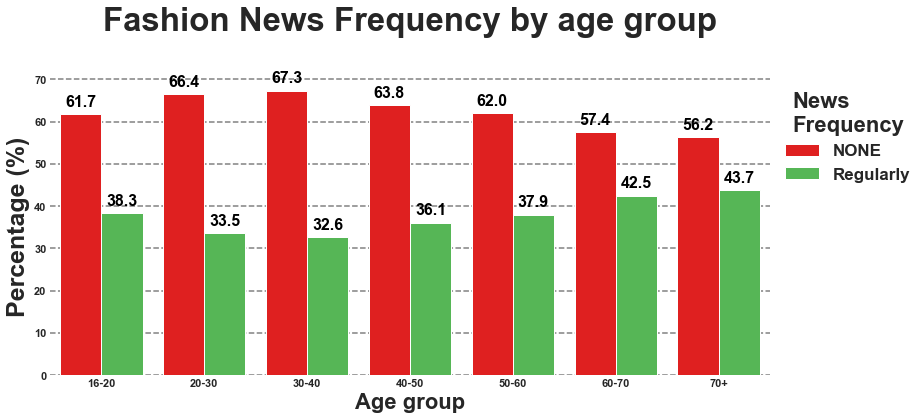

In [139]:
palette1 = {"Regularly":'#46C646', "NONE":'#FF0000'}

plt.figure(figsize=(13,6))
plt.title("Fashion News Frequency by age group\n",fontweight="bold", size=33)
g=sns.barplot(x="age_groups", y="percent(%)",data=df_age_news, hue="fashion_news_frequency", palette=palette1)
plt.xlabel("Age group",fontweight="bold", size=22)
plt.ylabel("Percentage (%)",fontweight="bold", size=25)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=16, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.legend(title='News\nFrequency',bbox_to_anchor=(1.0, 1.0), ncol=1, fancybox=True, shadow=True, fontsize=17,title_fontsize=22)
plt.show()

We can see that customers in the range 20-30 and 30-40 have the lowest percentage of fashion news frequency, while being the groups which buy the most. Moreover, the frequency of customer that regulary check fashion news starts increasing from the range 40-50, with a peak value of 43.7% of regular/active users for customers in the range 70+ years old. This means that checking fashion news seems to be more effective for older customers, who still represent a small percentage of total sold products, while younger customers do not need to check the news to buy new products. It could be effective for the company to invite younger customers (range 20-40) to check the news more frequently in order to increase the sold items.

Q8 - Does the club member status influence the purchased quantity?

In [140]:
cust_details["club_member_status"].value_counts(normalize=True)

ACTIVE        0.931395
PRE-CREATE    0.068261
LEFT CLUB     0.000344
Name: club_member_status, dtype: float64

More than 93% of the customers belong to the ACTIVE category

6.8% of the customers belong to the PRE-CREATE cateory

0.3% of the customers belong to the LEFT CLUB category

In [141]:
print("The average quantity of purchased products by the customers is {:.0f} products ".format(cust_details["article_id"].mean()))


The average quantity of purchased products by the customers is 23 products 


In [142]:
print("The average quantity of purchased products by the ACTIVE customers is {:.0f} products ".format(cust_details.groupby("club_member_status")["article_id"].mean()["ACTIVE"]))
print("The average quantity of purchased products by the LEFT-CLUB customers is {:.0f} products ".format(cust_details.groupby("club_member_status")["article_id"].mean()["LEFT CLUB"]))
print("The average quantity of purchased products by the PRE-CREATE customers is {:.0f} products ".format(cust_details.groupby("club_member_status")["article_id"].mean()["PRE-CREATE"]))

The average quantity of purchased products by the ACTIVE customers is 25 products 
The average quantity of purchased products by the LEFT-CLUB customers is 18 products 
The average quantity of purchased products by the PRE-CREATE customers is 7 products 


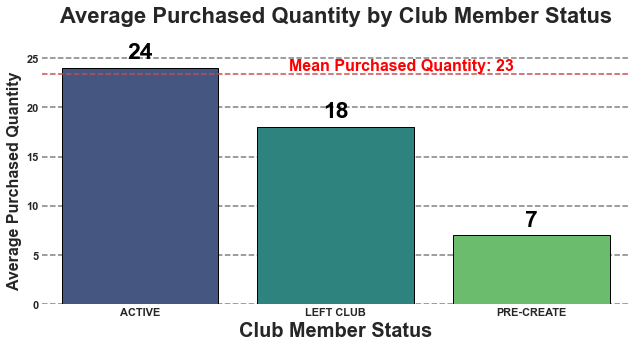

In [143]:
plt.figure(figsize=(9,5))
plt.title("Average Purchased Quantity by Club Member Status\n", fontweight="bold", size=22)
g = sns.barplot(x="club_member_status", y="article_id", data=cust_details.groupby("club_member_status")["article_id"].mean().astype(int).reset_index(), palette="viridis", edgecolor="black")
plt.axhline(y = cust_details["article_id"].mean(), color = 'r', linestyle = '--')
plt.text(0.76, 23.7, 'Mean Purchased Quantity: {:.0f}'.format(cust_details["article_id"].mean()), size=16, color="red",fontweight="bold")
plt.xlabel("Club Member Status",fontweight="bold", size=20)
plt.ylabel("Average Purchased Quantity",fontweight="bold", size=16)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.0f', fontsize=23, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

customers belonging to the ACTIVE clubs, purchase more products than other categoriesm

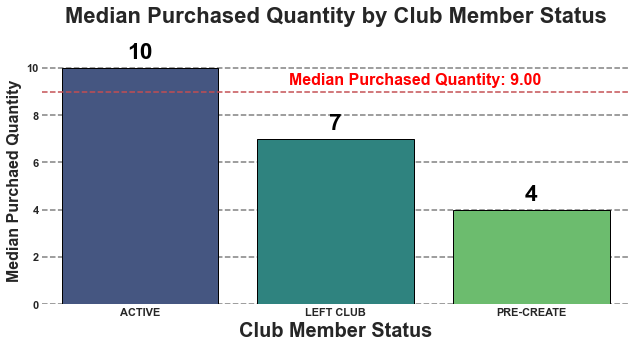

In [146]:
plt.figure(figsize=(9,5))
plt.title("Median Purchased Quantity by Club Member Status\n", fontweight="bold", size=22)
g = sns.barplot(x="club_member_status", y="article_id", data=cust_details.groupby("club_member_status")["article_id"].median().reset_index(), palette="viridis", edgecolor="black")
plt.axhline(y = cust_details["article_id"].median(), color = 'r', linestyle = '--')
plt.text(0.76, 9.3, 'Median Purchased Quantity: {:.2f}'.format(cust_details["article_id"].median()), size=16, color="red",fontweight="bold")
plt.xlabel("Club Member Status",fontweight="bold", size=20)
plt.ylabel("Median Purchaed Quantity",fontweight="bold", size=16)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.0f', fontsize=23, color="black")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

In [147]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
from PIL import Image

In [154]:
print(f"files and folders: {os.listdir('D:/VIEH INTERNSHIP H&M/images')}")


files and folders: ['010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', 'images.zip']


In [155]:
total_folders = total_files = 0
folder_info = []
images_names = []
for base, dirs, files in tqdm(os.walk('D:/VIEH INTERNSHIP H&M/')):
    for directories in dirs:
        folder_info.append((directories, len(os.listdir(os.path.join(base, directories)))))
        total_folders += 1
    for _files in files:
        total_files += 1
        if len(_files.split(".jpg"))==2:
            images_names.append(_files.split(".jpg")[0])

89it [00:00, 314.48it/s]


In [156]:
print(f"Total number of folders: {total_folders}\nTotal number of files: {total_files}")
folder_info_df = pd.DataFrame(folder_info, columns=["folder", "files count"])
folder_info_df.sort_values(["files count"], ascending=False).head()

Total number of folders: 88
Total number of files: 105126


folder  files count
61    069         4187
65    073         3438
54    062         3361
60    068         3313
62    070         3309

In [158]:
print("folder names: ", list(folder_info_df.folder.unique()))

folder names:  ['code', 'images', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095']


In [165]:
articles_df = pd.read_csv("articles.csv")
customers_df = pd.read_csv("customers.csv")
sample_submission_df = pd.read_csv("sample_submission.csv")

MemoryError: Unable to allocate 1.00 MiB for an array with shape (131072,) and data type int64

In [ ]:
transactions_train_df = pd.read_csv("transactions_train.csv")

In [ ]:
articles_df.head()


In [ ]:
customers_df.head()


In [ ]:
sample_submission_df.head()

In [ ]:
transactions_train_df.head()